In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import h5py
import os
from scipy.stats import norm, halfnorm
import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [2]:
from general_model import temporally_augment, model_sample, sampling_visualisation, print_ess

In [3]:
project_dir = '/home/fb/Documents/Intern_Project'

data_dir = os.path.join(project_dir, 'data')
data_filepath = os.path.join(data_dir, 'BGD_daily_inc_fatalities.h5')

data = pd.read_hdf(data_filepath,
                   key='event_data')

data = temporally_augment(data)

# Report results

In this notebook I find the results of running the models which I require for the written report. This includes evaluation of the Metropolis-Hastings sampler and the Stan sampler, and results on the posterior model parameters and the marginal liklelihoods of the models.

## Metropolis Hastings evaluation

In this first section I find results to evaluate the performance of the Metropolis-Hastings sampler on Battles in Dhaka.

In [131]:
data_filter = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

### Logistic Regression

In [ ]:
parameter_names = ['alpha', 'beta_']

parameter_info = {'names':['alpha', 'beta_'],
                  'hyperparameters':[[0,1], [0,1]],
                  'stepsizes':[0.7, 0.7]}

samples_1 = model_sample(1, data, data_filter, parameter_info=parameter_info, stan_seed=1)

Sampling using Metropolis Hastings MCMC, returning data frame
Proposal acceptance rate of 0.3135 for parameter alpha
Proposal acceptance rate of 0.3587 for parameter beta_


In [132]:
print_ess(samples_1, parameter_names)
fig, ax = sampling_visualisation(samples_1, parameter_names, figsize=(15, 10))
fig.suptitle('Metropolis-Hastings sampling for the Logistic Regression Model', size=16)

plt.tight_layout()
plt.show()

Effective sample size of 492.15112751395446 for parameter alpha
Effective sample size of 512.1841276094485 for parameter beta_


KeyError: 'gamma_'

Sampling using Metropolis Hastings MCMC, returning data frame
Proposal acceptance rate of 0.3135 for parameter alpha
Proposal acceptance rate of 0.3587 for parameter beta_
Effective sample size of 684.489357255471 for parameter alpha
Effective sample size of 732.7525809815426 for parameter beta_


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

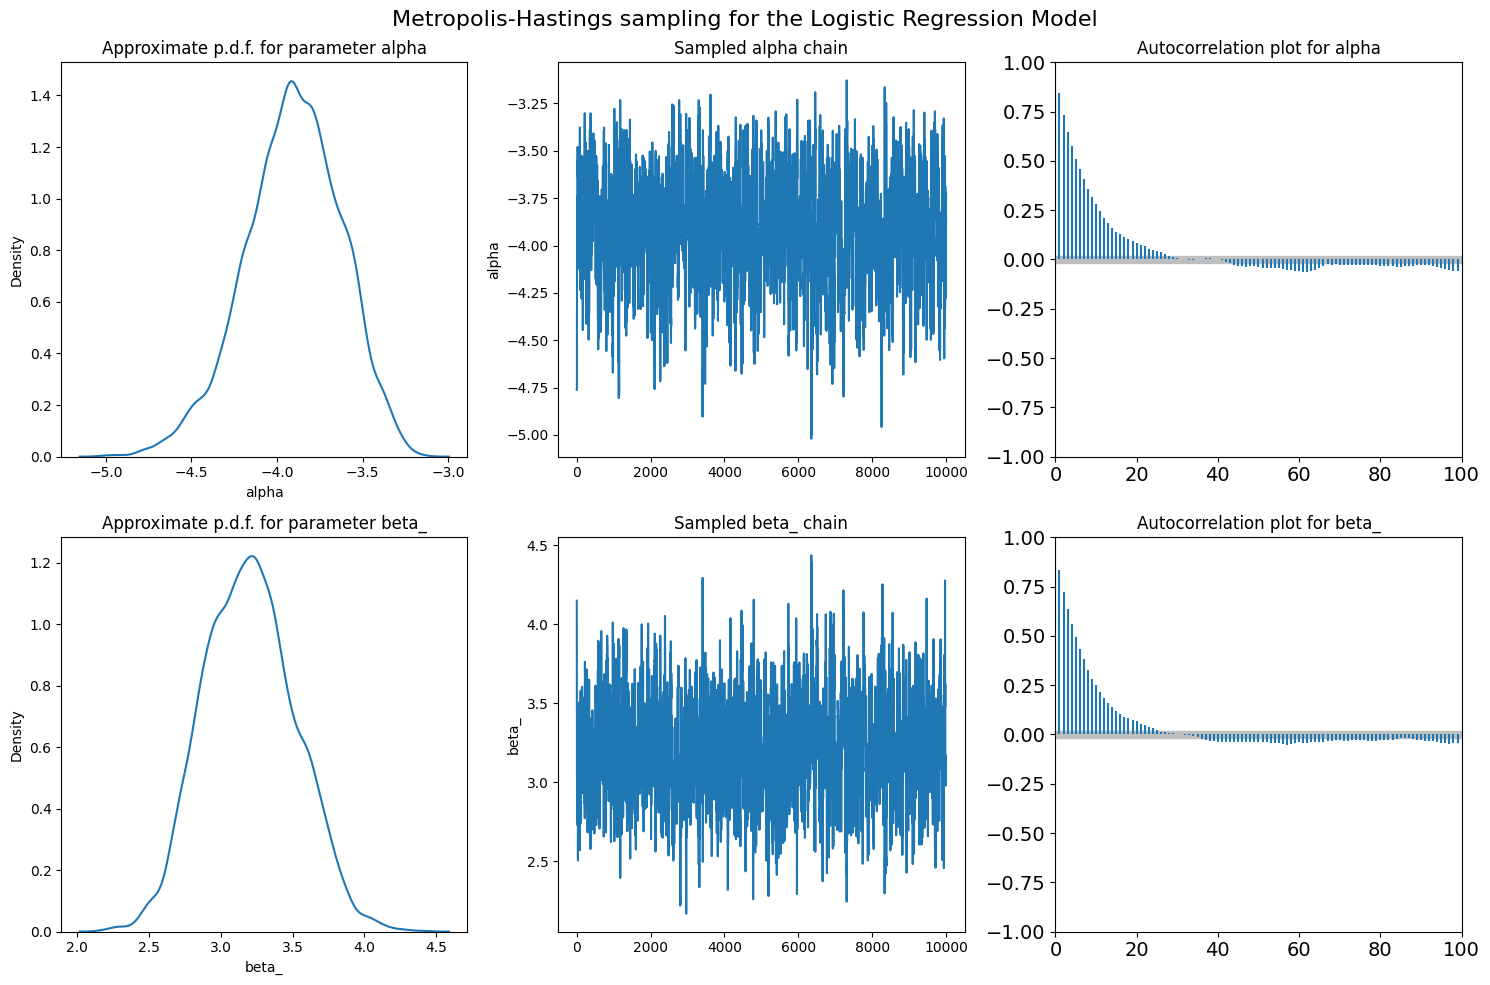

In [134]:
parameter_names = ['alpha', 'beta_']

parameter_info = {'names':['alpha', 'beta_'],
                  'hyperparameters':[[0,1], [0,1]],
                  'stepsizes':[0.7, 0.7]}

samples_1 = model_sample(1, data, data_filter, parameter_info=parameter_info, stan_seed=1)

print_ess(samples_1, parameter_names)
fig, ax = sampling_visualisation(samples_1, parameter_names, figsize=(15, 10))
fig.suptitle('Metropolis-Hastings sampling for the Logistic Regression Model', size=16)

plt.tight_layout()
plt.show()

Sampling using Metropolis Hastings MCMC, returning data frame
Proposal acceptance rate of 0.3165 for parameter alpha
Proposal acceptance rate of 0.3591 for parameter beta_
Proposal acceptance rate of 0.4677 for parameter gamma_
Effective sample size of 671.3978311217166 for parameter alpha
Effective sample size of 691.5171667930075 for parameter beta_
Effective sample size of 1728.1754829897054 for parameter gamma_


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

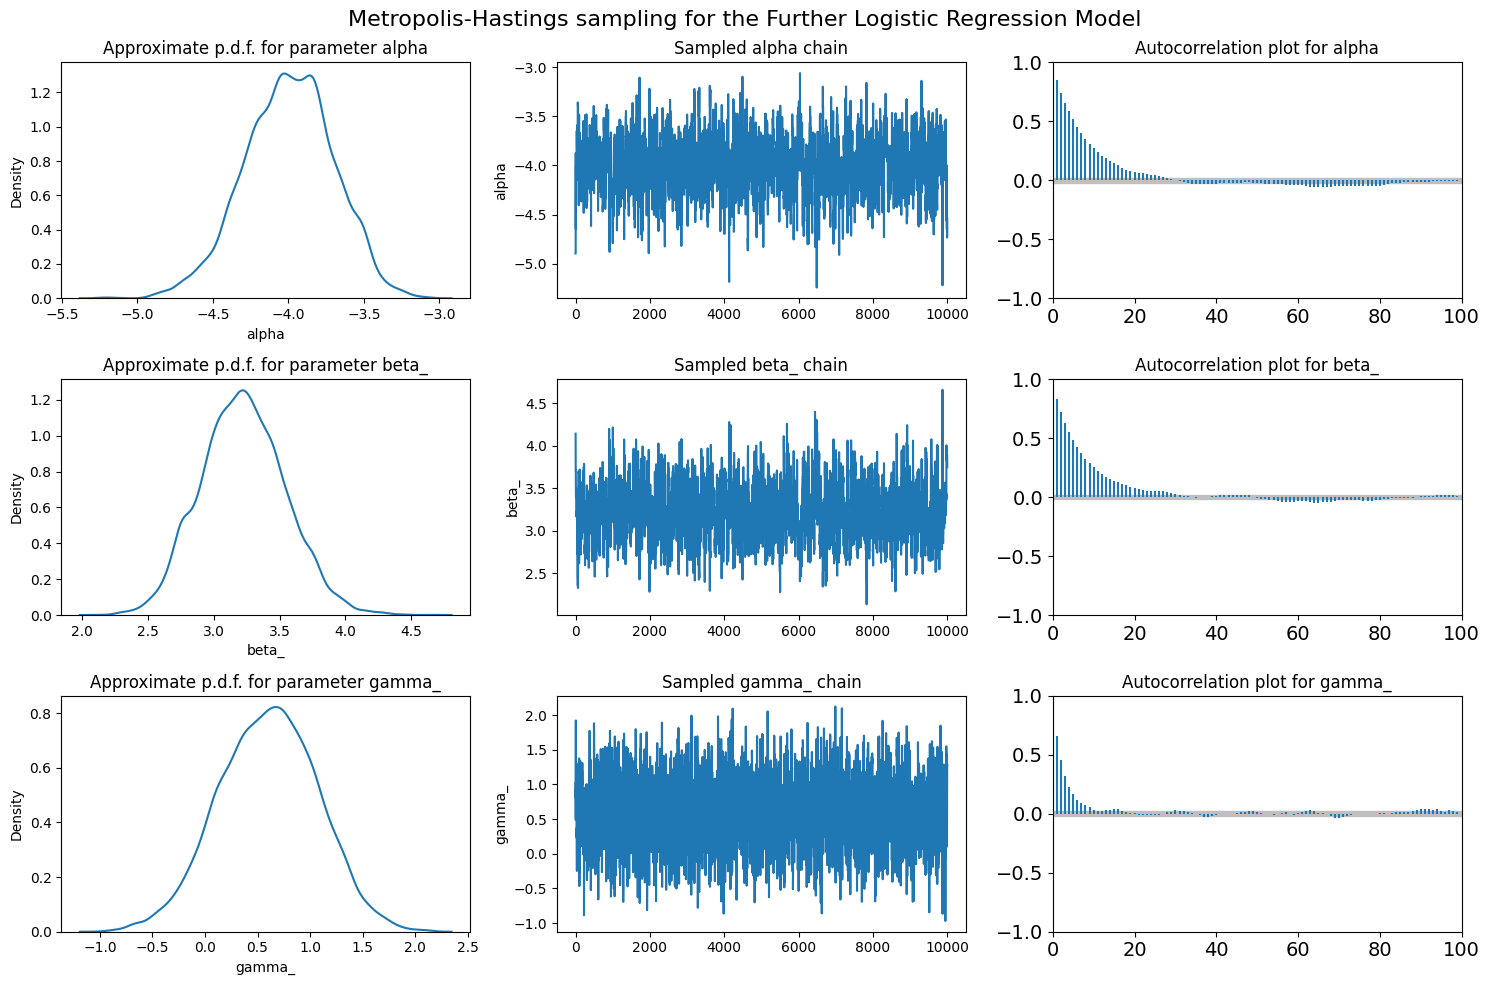

In [135]:
parameter_names = ['alpha', 'beta_', 'gamma_']

parameter_info = {'names':['alpha', 'beta_', 'gamma_'],
                  'hyperparameters':[[0,1], [0,1], [0,1]],
                  'stepsizes':[0.7, 0.7, 1.0]}

samples_2 = model_sample(2, data, data_filter, parameter_info=parameter_info, stan_seed=1)

print_ess(samples_2, parameter_names)
fig, ax = sampling_visualisation(samples_2, parameter_names, figsize=(15, 10))
fig.suptitle('Metropolis-Hastings sampling for the Further Logistic Regression Model', size=16)

plt.tight_layout()
plt.show()

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Metropolis-Hastings MCMC, returning data frame


/home/fb/Documents/Intern_Project/src/mcmc_functions.py:205: RuntimeWarning: divide by zero encountered in scalar divide
  return np.log(x/(1-x))


Proposal acceptance rate of 0.3675 for parameter pK
Proposal acceptance rate of 0.9956 for parameter q.2
Proposal acceptance rate of 0.2206 for parameter q.1
Effective sample size of 1021.8029019477641 for parameter pK
Effective sample size of 18.915707746149256 for parameter q.2
Effective sample size of 738.1544790056223 for parameter q.1


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

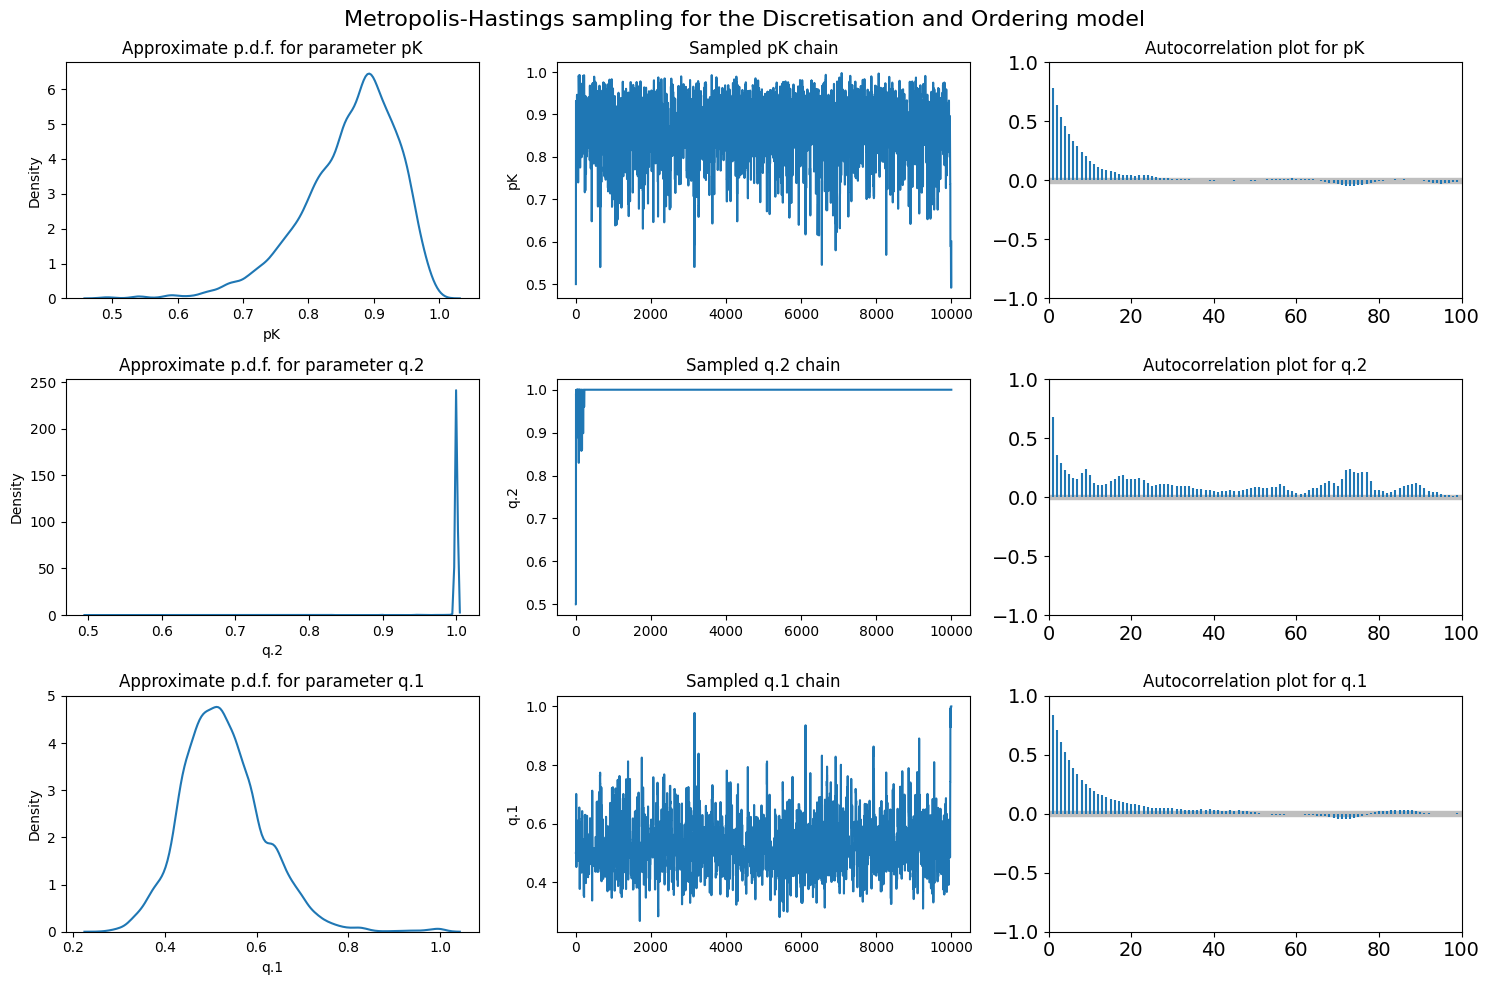

In [137]:
parameter_names = ['pK', 'q.2', 'q.1']

parameter_info = {'names':parameter_names,
                  'hyperparameters':[[1,1], [1,1], [1,1]],
                  'stepsizes':[0.2, 0.07, 0.2]}

samples_4 = model_sample(4, data, data_filter, parameter_info=parameter_info, stan_seed=1, max_bin=3)

print_ess(samples_4, parameter_names)
fig, ax = sampling_visualisation(samples_4, parameter_names, figsize=(15, 10))
fig.suptitle('Metropolis-Hastings sampling for the Discretisation and Ordering model', size=16)

plt.tight_layout()
plt.show()

Sampling using Metropolis-Hastings MCMC, returning data frame
Proposal acceptance rate of 0.3308 for parameter p.1
Effective sample size of 2002.514944435486 for parameter p.1


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

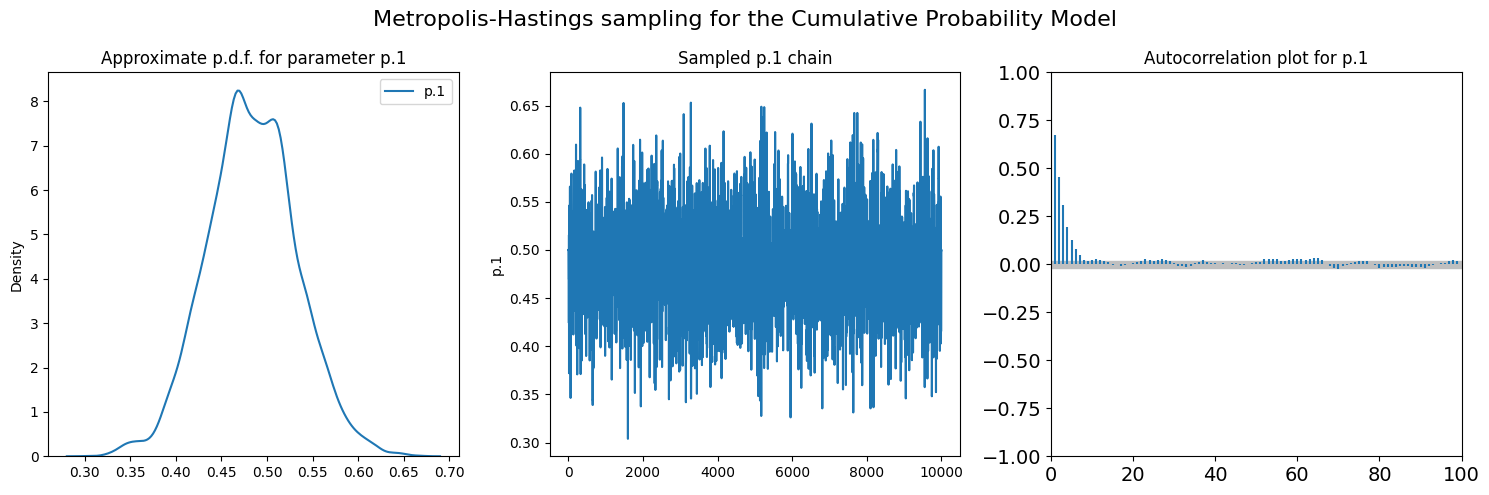

In [141]:
parameter_names = ['p.1']

parameter_info = {'names':parameter_names,
                  'hyperparameters':[1,1],
                  'stepsizes':[0.5]}

samples_6 = model_sample(6, data, data_filter, parameter_info=parameter_info, stan_seed=1)

print_ess(samples_6, parameter_names)
fig, ax = sampling_visualisation(samples_6, parameter_names, figsize=(15, 5))
fig.suptitle('Metropolis-Hastings sampling for the Cumulative Probability Model', size=16)

plt.tight_layout()
plt.show()

/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

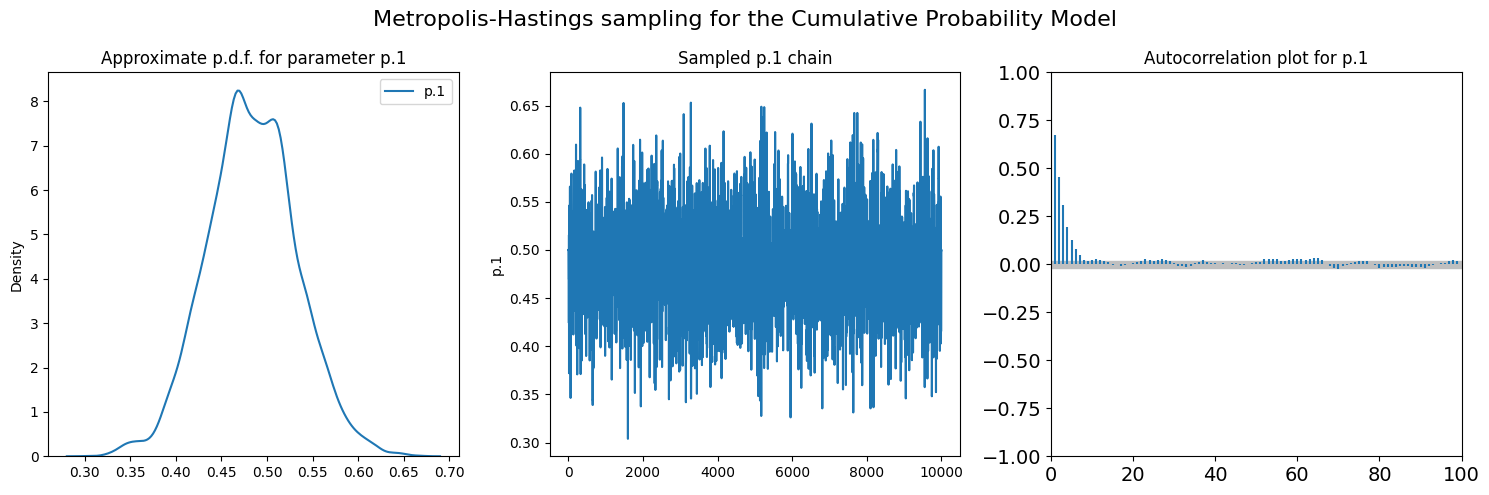

In [142]:
fig, ax = sampling_visualisation(samples_6, parameter_names, figsize=(15, 5))
fig.suptitle('Metropolis-Hastings sampling for the Cumulative Probability Model', size=16)

plt.tight_layout()
plt.show()

In [4]:
from general_model import auto_max_bin, posterior_probability_plot, model_observations
from mcmc_functions import single_logit, logit_ll, mod4_llh, mod6_llh
from hypothesis_testing import nr4_marginal_likelihood

## Modelling results on events and divisions

In this section, for every Model/Event combination, I find the posterior means and quantiles for each of the model parameters for models.

In [5]:
event_colours = {'Battles': (0.75, 0.3125, 0.4375),
                 'Explosions/Remote violence': (0.8125, 0.5, 0.1875),
                 'Riots': (0.75, 0.6875, 0.0),
                 'Violence against civilians': (0.3125, 0.5625, 0.0625),
                 'Protests': (0.1875, 0.375, 0.6875),
                 'Strategic developments': (0.5, 0.0625, 0.4375)}

In [6]:
divisions = np.unique(data['ADMIN1'].values)
violent_events = ['Battles', 'Explosions/Remote violence', 'Riots', 'Violence against civilians']

In [7]:
main_frame_cols = ['Event', 'Division', 'alpha', 'beta', 'alpha (ignore 0)', 'beta (ignore 0)', 'p', 'p.1']
mod4_frame_cols = ['Event', 'Division']
mod4_frame_cols.extend([f'p.{i}' for i in range(1, 13)])
marg_frame_cols = ['Event', 'Division', 'Logistic', 'Logistic-ignore zero', 'Discretisation', 'Cumulative', 'Null']

main_frame = pd.DataFrame(columns=main_frame_cols)
mod4_frame = pd.DataFrame(columns=mod4_frame_cols)
marg_frame = pd.DataFrame(columns=marg_frame_cols)

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.00019 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.9 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000209 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001064 seconds
  1000 transitions using 10 leapfrog steps per transition would take 10.64 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000264 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.64 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000112 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.003266 seconds
  1000 transitions using 10 leapfrog steps per transition would take 32.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Barisal complete for event Battles


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 8.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.87 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.88 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000182 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.82 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000284 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.84 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000166 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000396 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.96 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.88 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000101 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000157 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000111 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Chittagong complete for event Battles


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000123 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000227 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.78 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000109 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.09 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Dhaka complete for event Battles


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00011 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000145 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.45 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000121 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Khulna complete for event Battles


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000218 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.79 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000161 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Mymensingh complete for event Battles


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.7e-05 second

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:  29% (31003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transiti

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:  25% (27002/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000403 seconds
  1000 transitions using 10 leapfrog steps per transition would take 4.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000265 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Rajshahi complete for event Battles


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.00013 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordin

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   2% (2002/108000)
Sampling:  27% (29002/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Rangpur complete for event Battles


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.9 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000142 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.42 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.9e-05 seconds
  1000 transitions using 10 l

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:  25% (27002/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.9 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Sylhet complete for event Battles


event Battles completed
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000132 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000128 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000125 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.79 seconds.
  Adjust your expectations a

Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Barisal complete for event Explosions/Remote violence


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.77 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.003305 seconds
  1000 transitions using 10 leapfrog steps per transition would take 33.05 seconds.
  Adjust your expectations accor

Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Chittagong complete for event Explosions/Remote violence


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000111 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  A

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   2% (2001/108000)
Sampling:  27% (29001/108000)
Sampling:  52% (56001/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Dhaka complete for event Explosions/Remote violence


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000171 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000114 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.92 seconds.
  Adjust your expectations accor

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:  25% (27001/108000)
Sampling:  50% (54001/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Khulna complete for event Explosions/Remote violence


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000189 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accord

Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Mymensingh complete for event Explosions/Remote violence


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:  29% (31003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000193 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.93 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000151 seconds
  1000 transitions using 10 leapfrog steps per transit

Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Rajshahi complete for event Explosions/Remote violence


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.75 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000126 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.26 seconds.
  Ad

Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Rangpur complete for event Explosions/Remote violence


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000118 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000121 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000168 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.68 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.88 seconds.

Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Sylhet complete for event Explosions/Remote violence


event Explosions/Remote violence completed
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adj

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000148 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000156 seco

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.77 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000123 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000186 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.86 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.91 seconds.
  Adjust your expectations ac

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Barisal complete for event Riots


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000237 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000205 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.05 seconds.


Discretisation and Ordering using 8 bins with parameter names ['pK', 'q.7', 'q.6', 'q.5', 'q.4', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.009826 seconds
  1000 transitions using 10 leapfrog steps per transition would take 98.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000771 seconds
  1000 transitions using 10 leapfrog steps per transition would take 7.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.002303 seconds
  1000 transitions using 10 leapfrog steps per transition would take 23.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000593 

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000143 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00016 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.6 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000309 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000274 seco

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Chittagong complete for event Riots


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000147 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
 

Discretisation and Ordering using 12 bins with parameter names ['pK', 'q.11', 'q.10', 'q.9', 'q.8', 'q.7', 'q.6', 'q.5', 'q.4', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.009813 seconds
  1000 transitions using 10 leapfrog steps per transition would take 98.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.002855 seconds
  1000 transitions using 10 leapfrog steps per transition would take 28.55 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001249 seconds
  1000 transitions using 10 leapfrog steps per transition would take 12.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000494

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000156 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.56 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000174 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000164 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.64 seconds.
  Adjust your expectations accordingly!
  Rejecting initial value:
    Log pro

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Dhaka complete for event Riots


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000132 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000131 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.6e-05 seco

Discretisation and Ordering using 6 bins with parameter names ['pK', 'q.5', 'q.4', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000126 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000156 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.56 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000166 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000132 se

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.95 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000219 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000114 seconds

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Khulna complete for event Riots


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000137 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
 

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.91 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000111 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
 

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Mymensingh complete for event Riots


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 8.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.82 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000146 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
  Adjust your expectations acc

Discretisation and Ordering using 8 bins with parameter names ['pK', 'q.7', 'q.6', 'q.5', 'q.4', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000145 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000145 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000165 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000461 se

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000119 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000176 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000109 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000101 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
  Adjust your expectations 

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Rajshahi complete for event Riots


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations acco

Discretisation and Ordering using 4 bins with parameter names ['pK', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.82 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.4e-05 seconds
 

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.75 seconds.
  Adjust your expectations accordingl

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Rangpur complete for event Riots


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations acco

Discretisation and Ordering using 4 bins with parameter names ['pK', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.88 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.9e-05 second

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000227 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accord

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Sylhet complete for event Riots


event Riots completed
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000121 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations acc

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Barisal complete for event Violence against civilians


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 le

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000254 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.88 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000258 seco

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 9.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.94 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000173 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.73 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.92 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000188 seco

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Chittagong complete for event Violence against civilians


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 6.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000137 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.37 seconds.
  Adjust your expectations acc

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000161 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.92 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000153 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.53 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-05 second

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 9.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.96 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.77 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000173 seconds
  1000 transitions using 1

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Dhaka complete for event Violence against civilians


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.92 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 second

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 6.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000157 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 secon

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:  29% (31003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000114 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.94 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00017 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transitio

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Khulna complete for event Violence against civilians


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000113 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Ad

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordi

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Mymensingh complete for event Violence against civilians


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000186 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.86 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000122 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.91 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000112 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.4e-05 seconds


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:  29% (31003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000154 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.68 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000113 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transit

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Rajshahi complete for event Violence against civilians


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000194 secon

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.88 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000263 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.63 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000133 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000119 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.82 seconds.
  Adjust your expectations a

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Rangpur complete for event Violence against civilians


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000215 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.15 seconds.
  Ad

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:  27% (29003/108000)
Sampling:  52% (56002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:  25% (27003/108000)
Sampling:  50% (54002/108000)
Sampling:  75% (81001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations acco

Sampling directly from the Beta distribution, returning data frame
found model 1 marg liks
found model 4 marg liks
found model 6 marg liks
found null model marg liks


location Sylhet complete for event Violence against civilians


event Violence against civilians completed


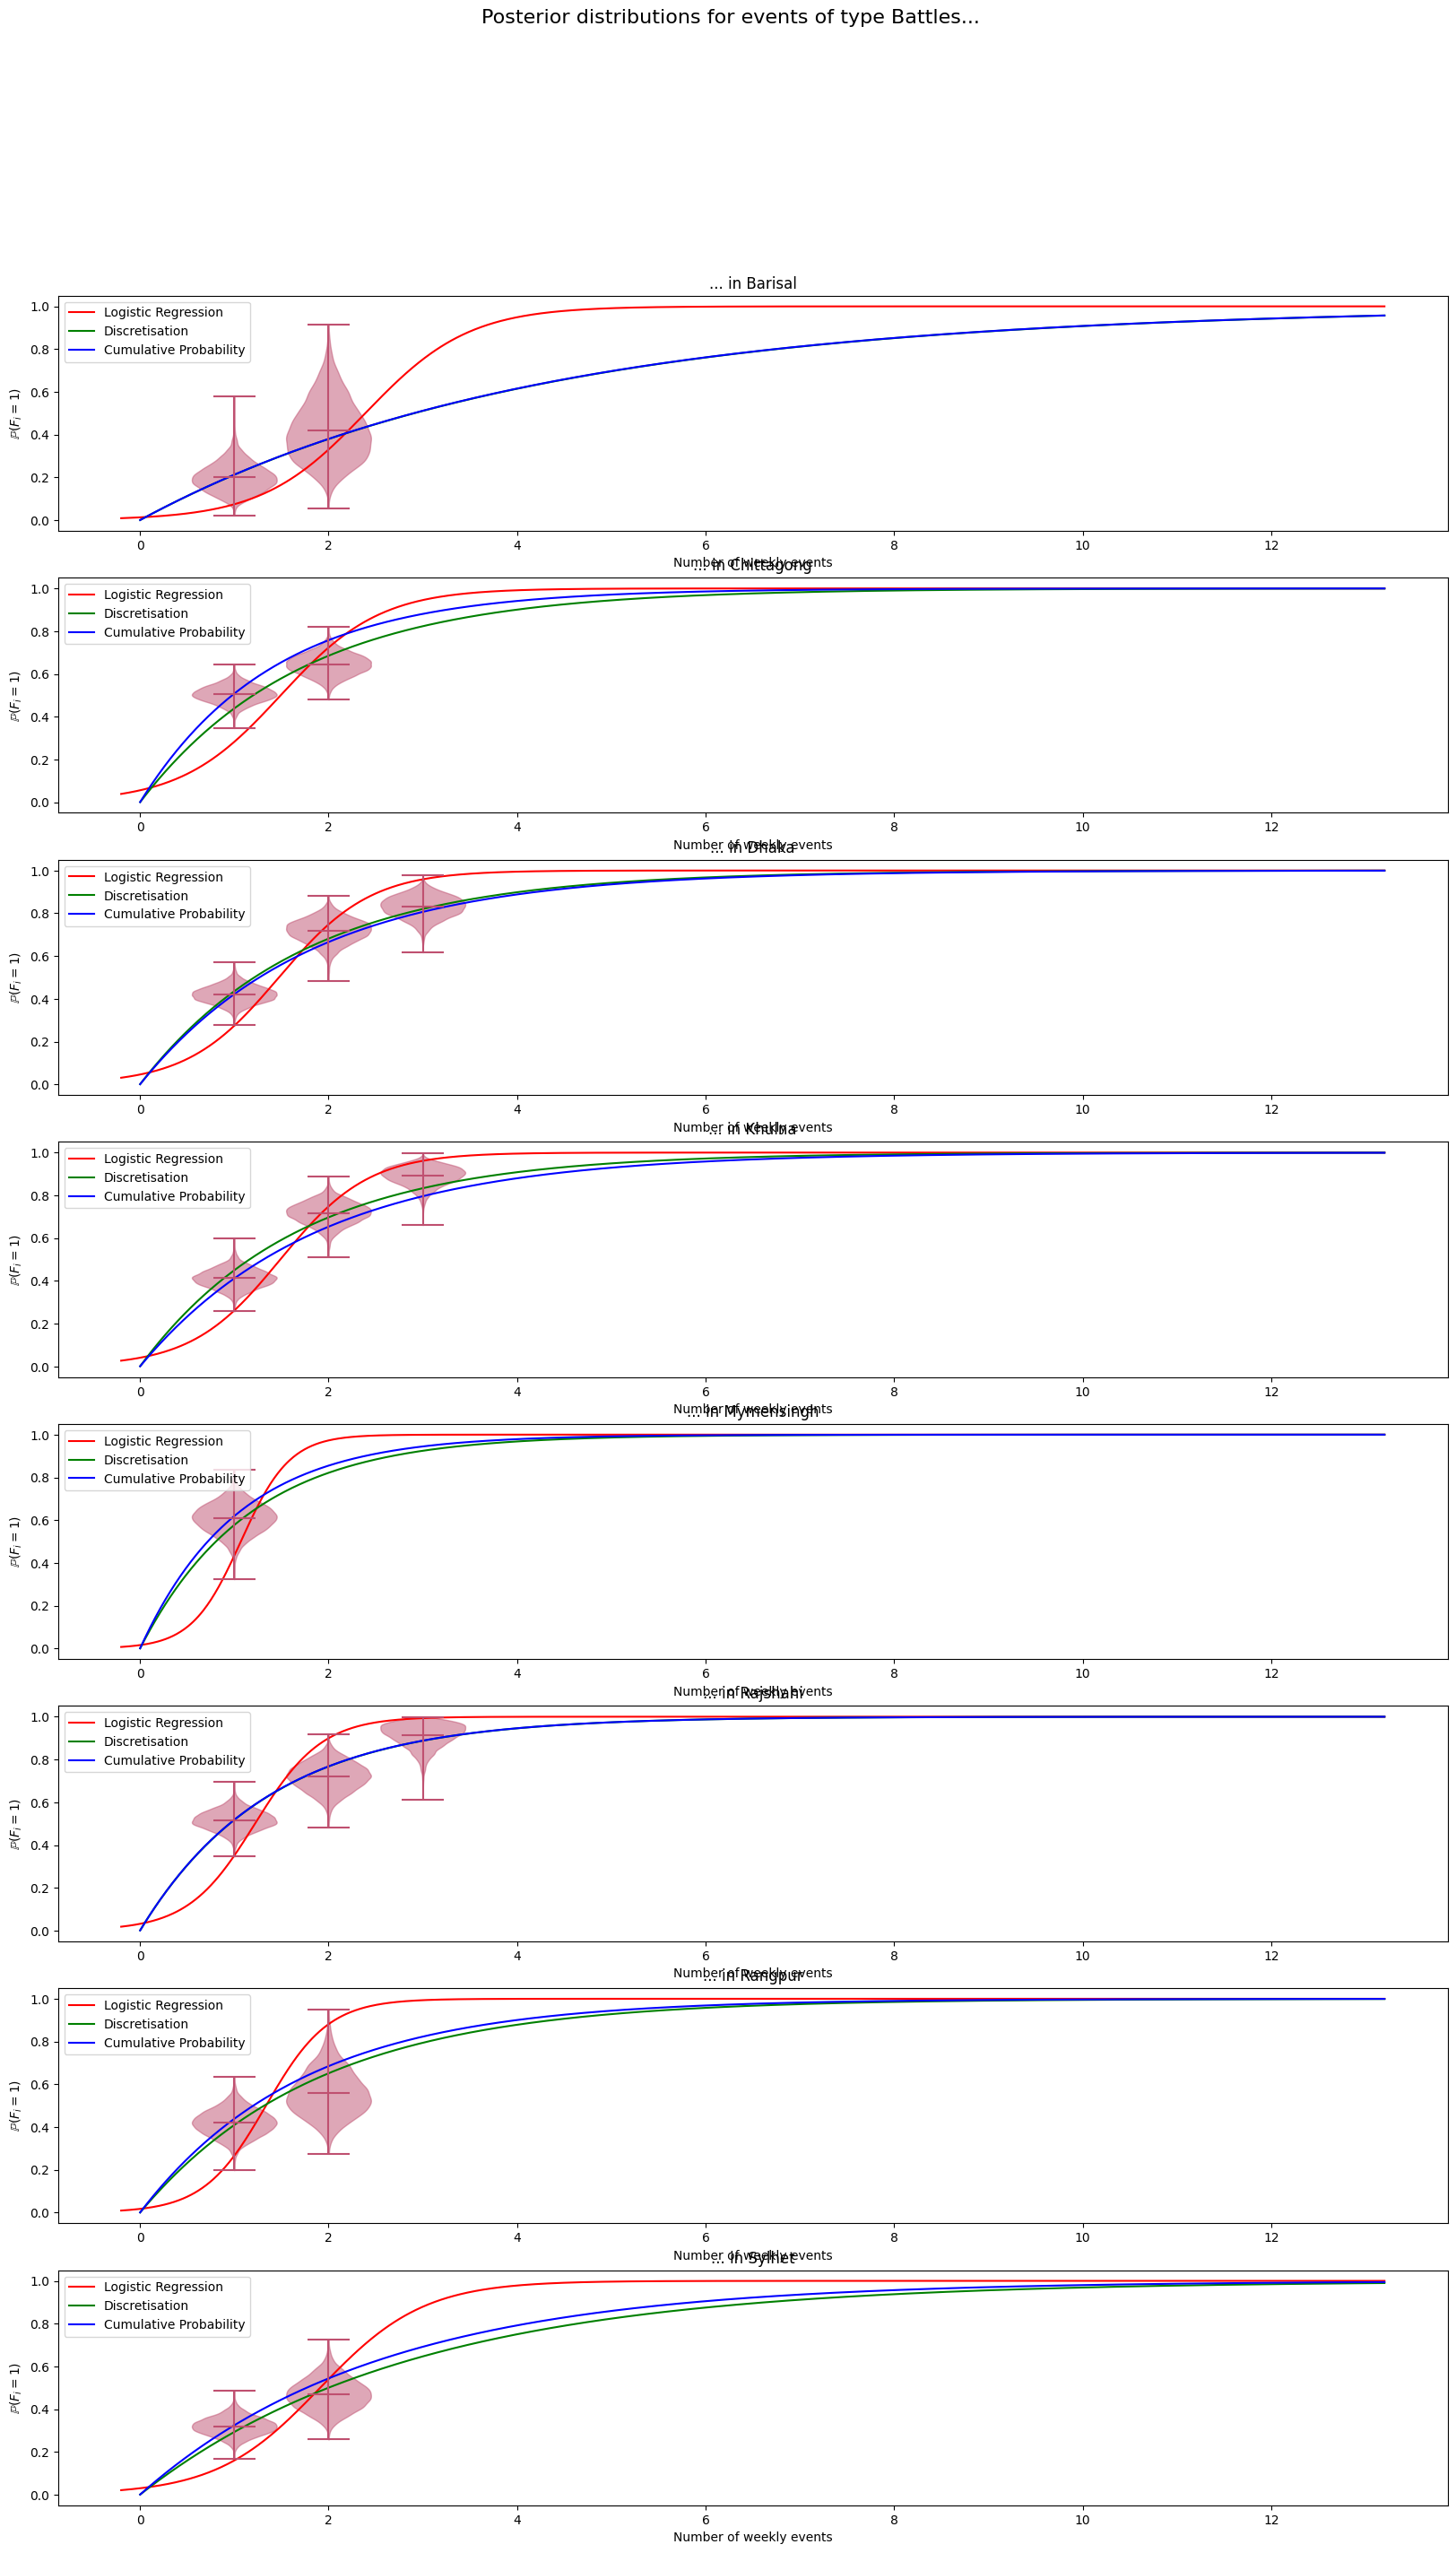

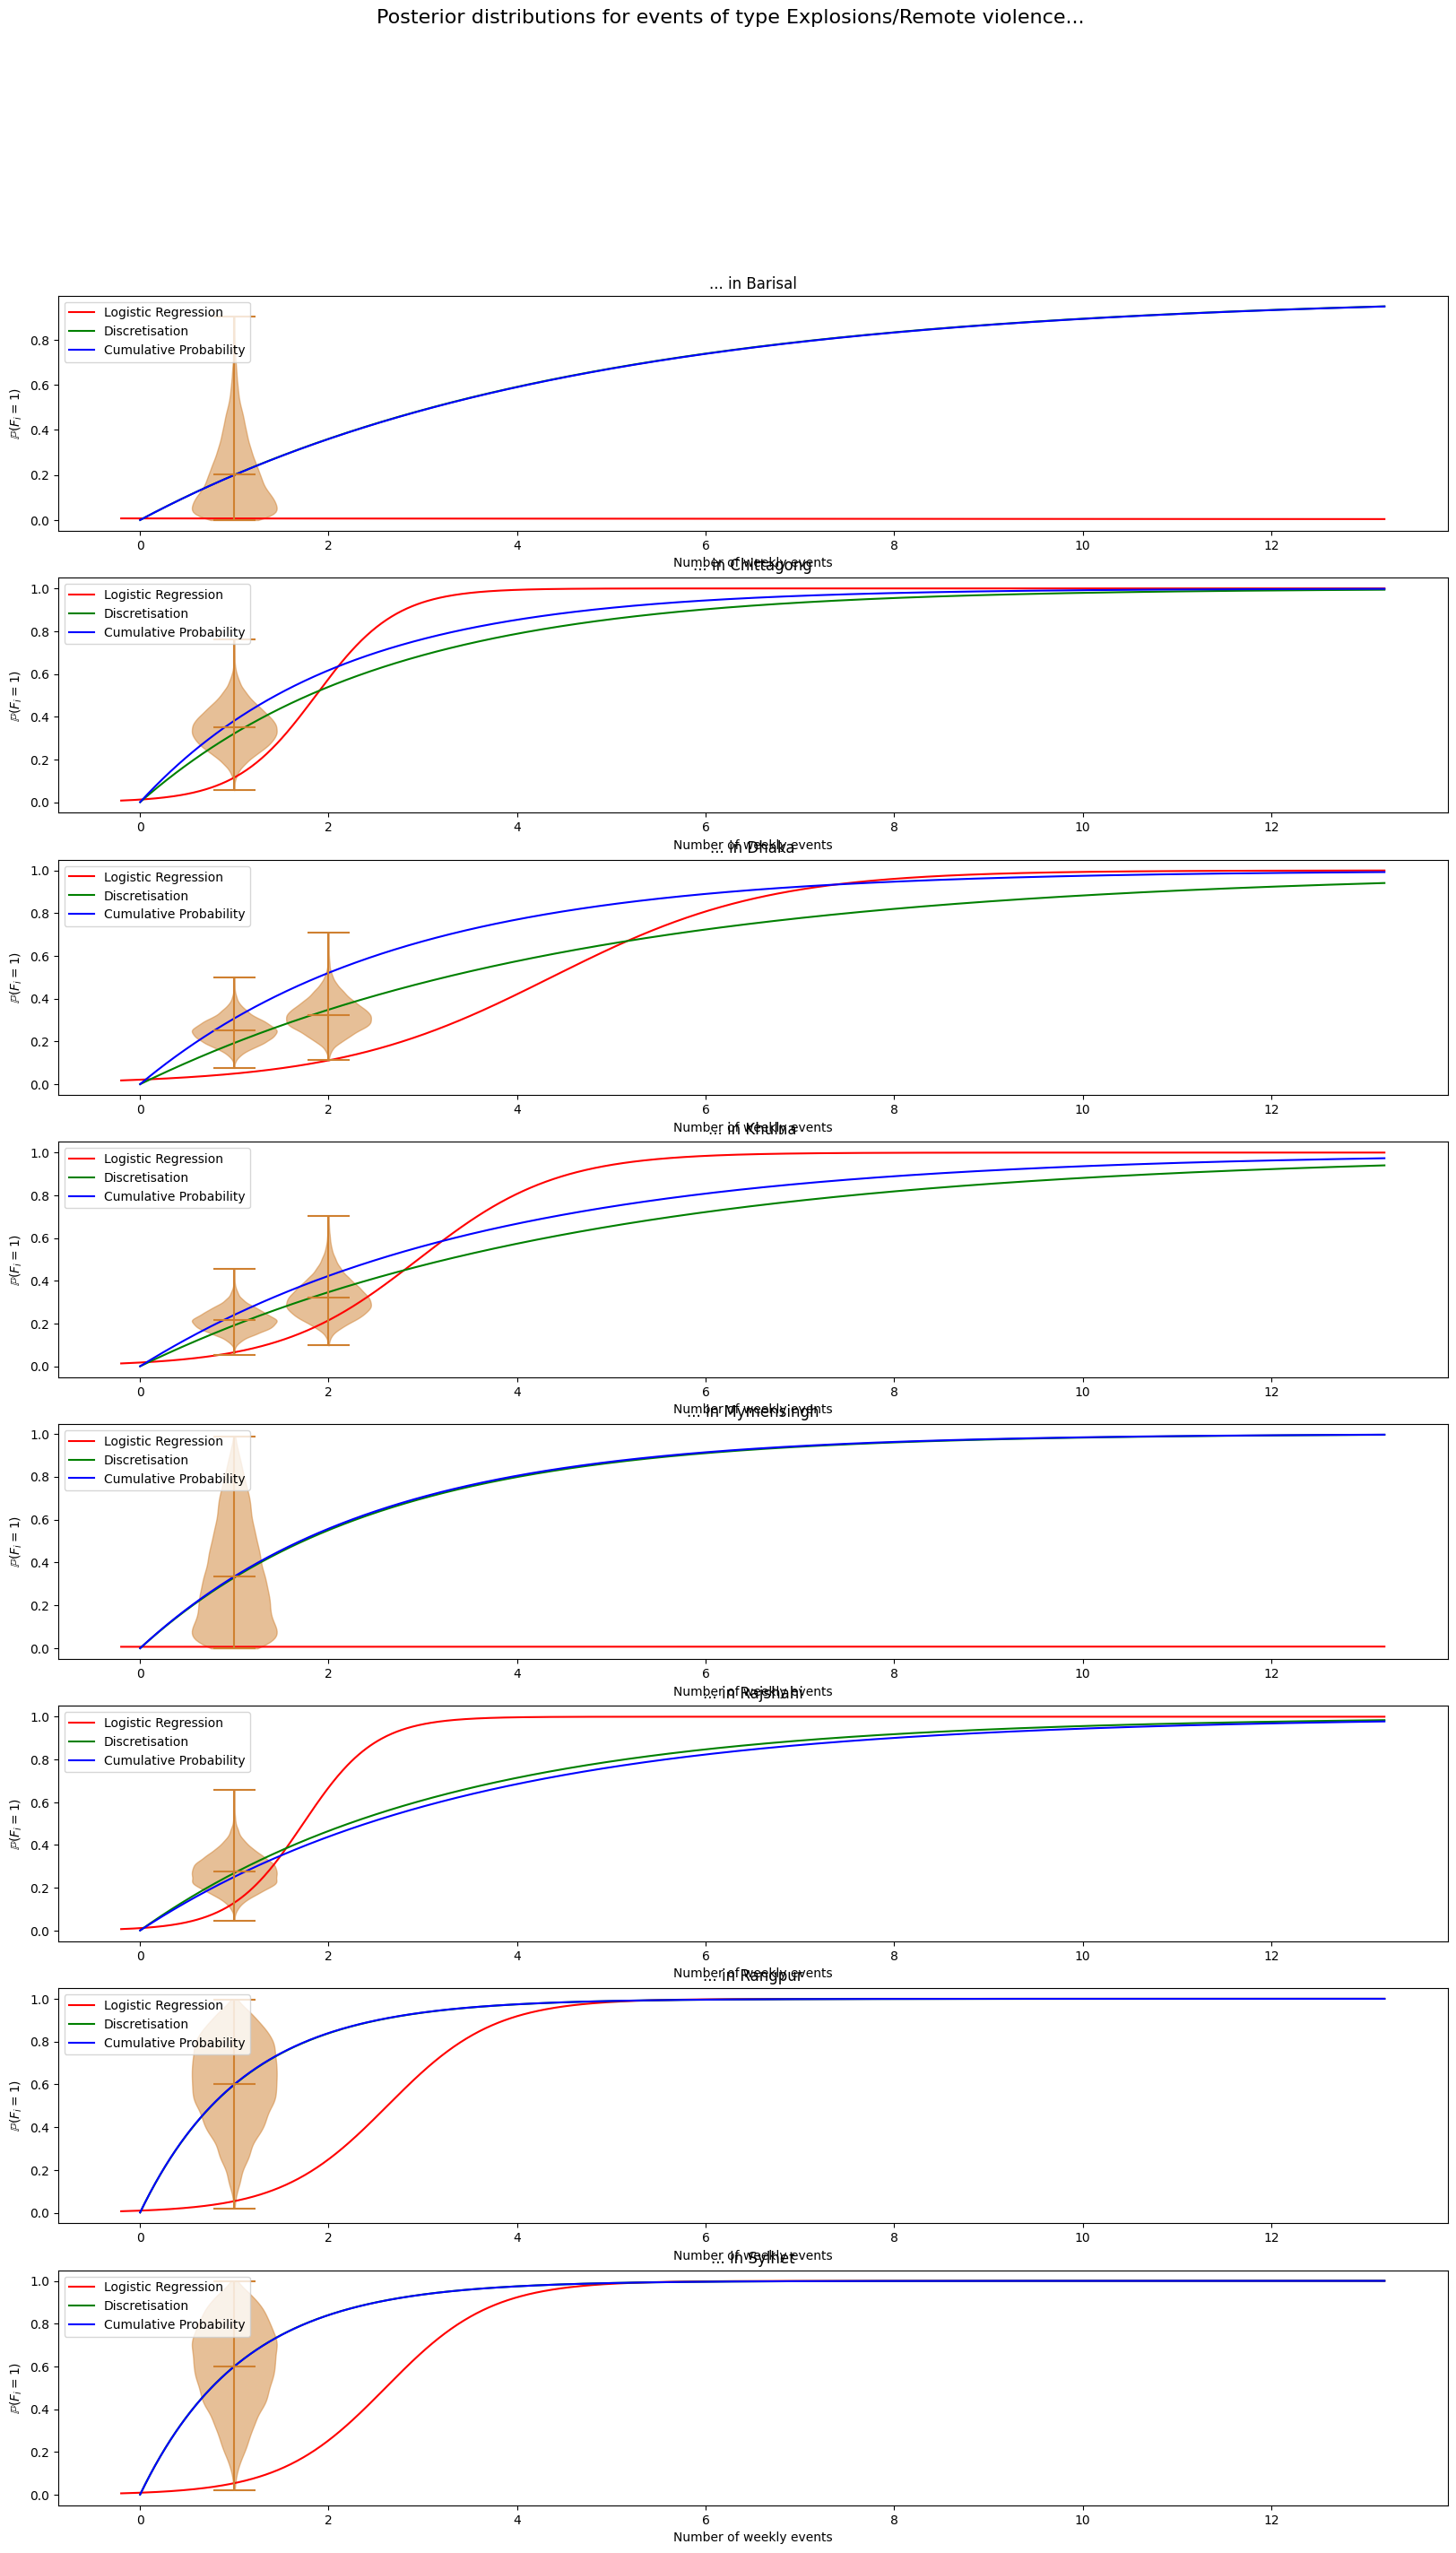

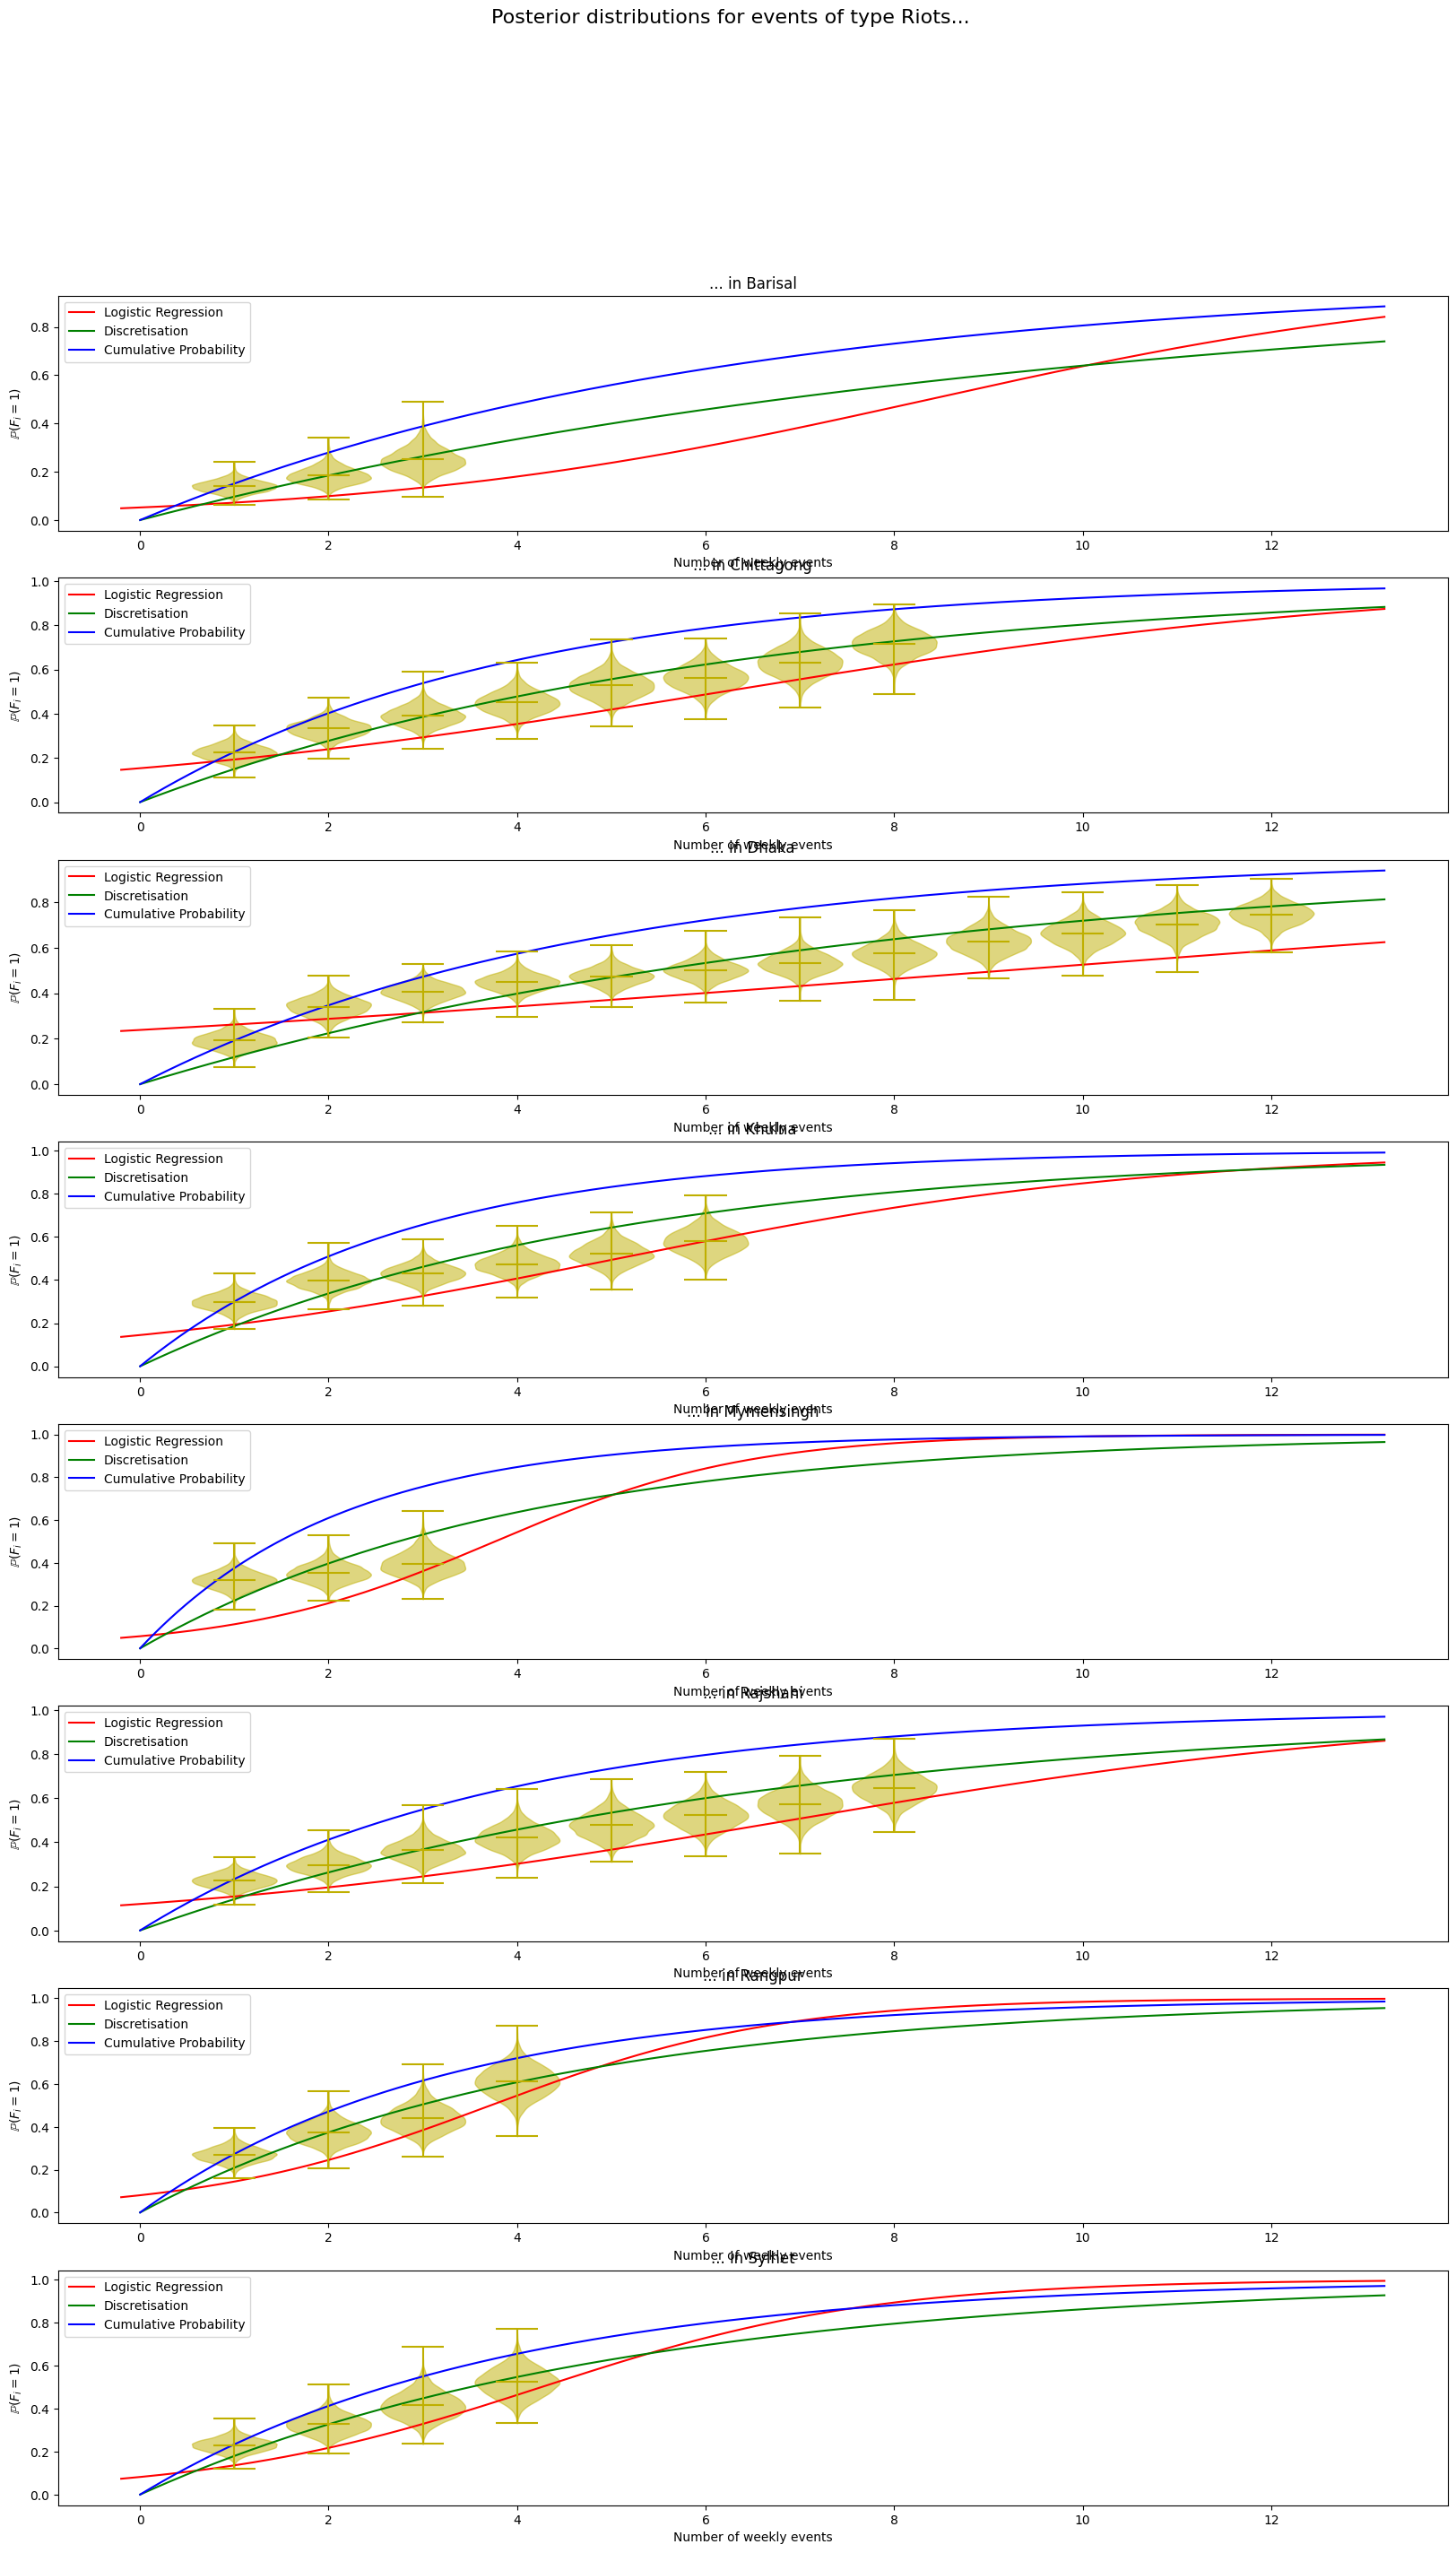

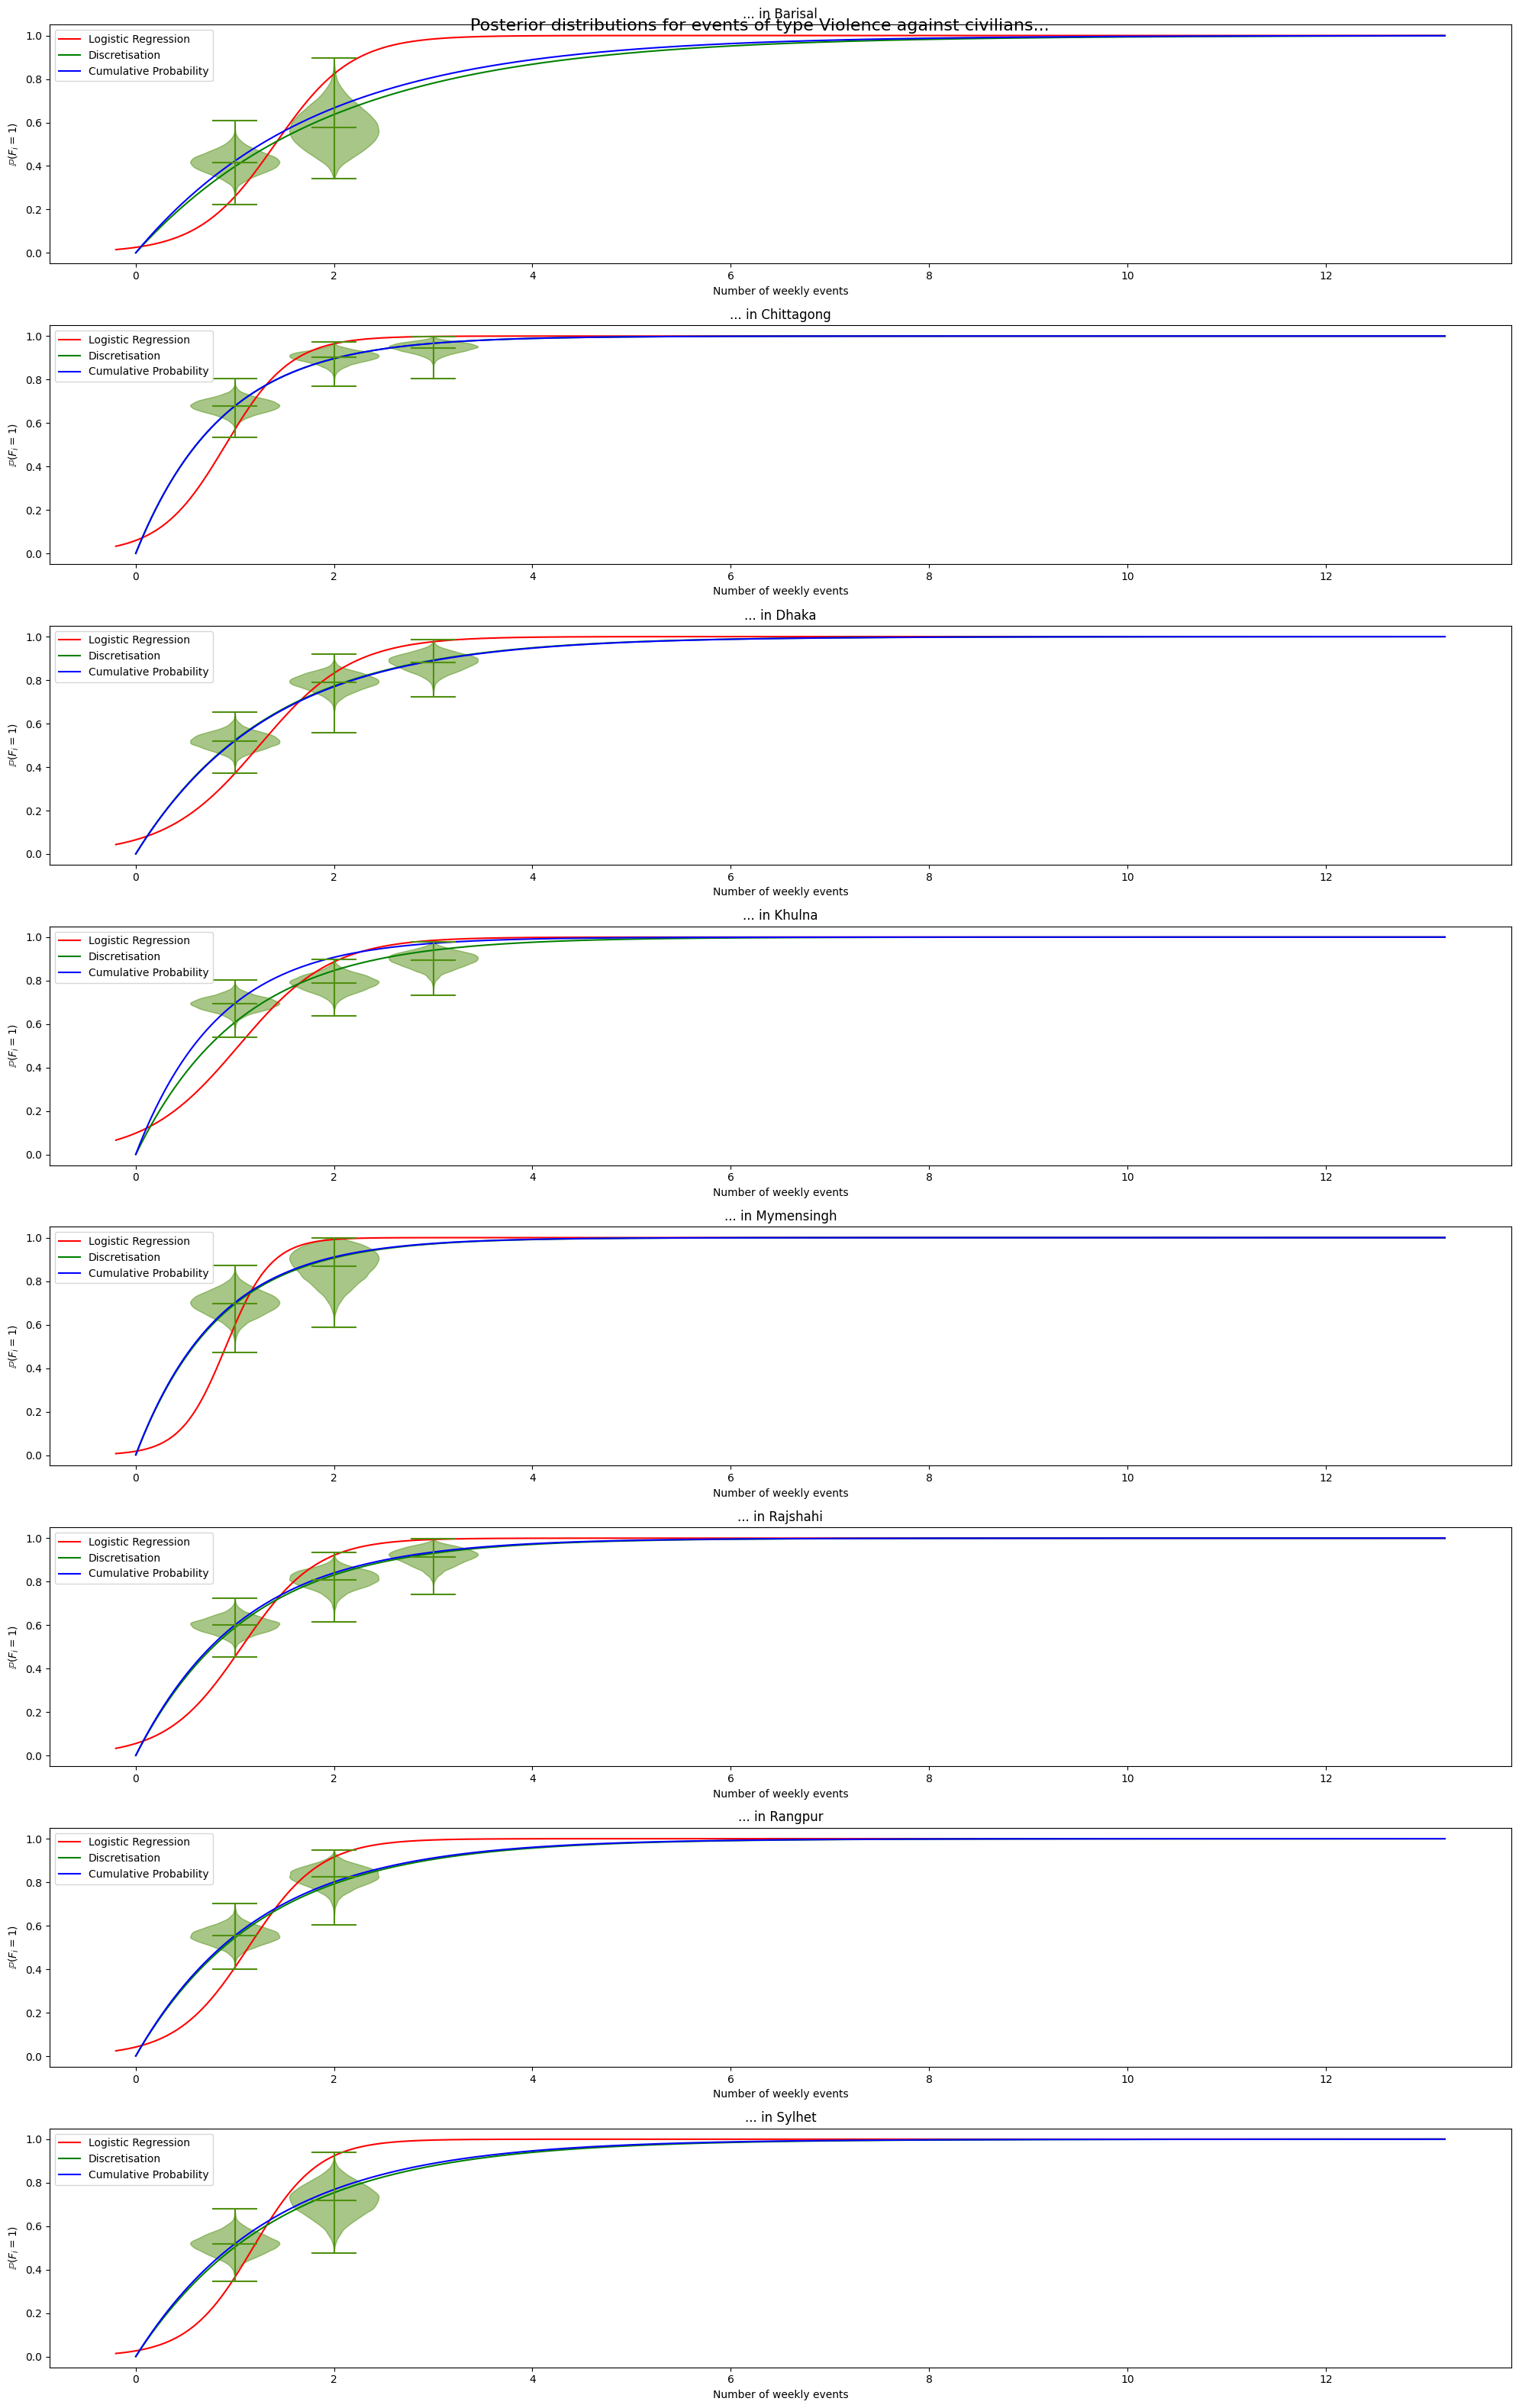

In [46]:
for event_idx, event in enumerate(violent_events):
    fig, ax = plt.subplots(8, figsize=(20, 32))
    color = event_colours[event]
    for div_idx, division in enumerate(divisions):
        data_filter = {'ADMIN1':division, 'EVENT_TYPE':event}
        max_bin = auto_max_bin(data, data_filter, bin_size=0.1)
        mod4_param_names = ['pK']
        mod4_param_names.extend([f'p.{k}' for k in reversed(range(1, max_bin))])

        mod1_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan')[1][['alpha', 'beta_']].values
        mod1a_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan', ignore_zero=True)[1][['alpha', 'beta_']].values
        mod4_samples = model_sample(4, data, data_filter, stan_filepath='stan_files/model4.stan', max_bin=max_bin)[1][mod4_param_names].values
        mod4_samples = mod4_samples[:, ::-1]
        mod6_samples = model_sample(6, data, data_filter, stan_filepath='stan_files/model6.stan')[1]['p'].values
        null_samples = model_sample('null', data, data_filter)['p.1'].values

        mod1_mean = np.mean(mod1_samples, axis=0)
        mod1a_mean = np.mean(mod1_samples, axis=0)
        mod4_mean = np.mean(mod4_samples, axis=0)
        mod6_mean = np.mean(mod6_samples)
        null_mean = np.mean(null_samples)

        mod1_resp, mod1_covs = model_observations(1, data, data_filter)
        mod1a_resp, mod1a_covs = model_observations(1, data, data_filter, ignore_zero=True)
        mod4_resp, mod4_covs = model_observations(4, data, data_filter, max_bin=max_bin, ignore_zero=True)
        mod6_resp, mod6_covs = model_observations(6, data, data_filter, ignore_zero=True)
        null_resp, null_covs = model_observations(6, data, data_filter, ignore_zero=True)

        mod1_marg = nr4_marginal_likelihood(mod1_samples, logit_ll, mod1_resp, mod1_covs, error=0.01)
        print('found model 1 marg liks')
        mod1a_marg = nr4_marginal_likelihood(mod1a_samples, logit_ll, mod1a_resp, mod1a_covs, error=0.01)
        print('found model 1a marg liks')
        mod4_marg = nr4_marginal_likelihood(mod4_samples, mod4_llh, mod4_resp, mod4_covs, error=0.01)
        print('found model 4 marg liks')
        mod6_marg = nr4_marginal_likelihood(mod6_samples, mod6_llh, mod6_resp, mod6_covs, error=0.01)
        print('found model 6 marg liks')
        null_marg = nr4_marginal_likelihood(null_samples, mod6_llh, null_resp, null_covs, error=0.01)
        print('found null model marg liks')

        count_axis = np.linspace(-0.2, 13.2, 1000)
        pos_axis = np.array([count for count in count_axis if count >= 0])

        nonzero_counts = []
        fatality_props = []
        num_obs_counts = []

        for count in range(axis_upper_limits[event_idx] + 1):
            count_data = event_loc_data.loc[event_loc_data['RAW_COUNTS'] == count]
            if len(count_data) > 0:
                zero_fatal = len(count_data.loc[count_data['FATALITIES'] == 0])
                with_fatal = len(count_data.loc[count_data['FATALITIES'] > 0])
                fatal_prop = with_fatal / (zero_fatal + with_fatal)
                if count != 0:
                    fatality_props.append(fatal_prop)
                    nonzero_counts.append(count)
                    num_obs_counts.append(with_fatal+zero_fatal)
                else:
                    ax[div_idx].plot(count, fatal_prop, 'ko')
        
        for count, fatal_prop, num_obs in zip(nonzero_counts, fatality_props, num_obs_counts):
            ax[div_idx].plot(count, fatal_prop, 'ko', markersize=5*len(num_obs_counts)*(num_obs/np.sum(num_obs_counts))**(1/2))

        mod1_probs = [single_logit(count, mod1_mean) for count in count_axis]
        mod1a_probs = [single_logit(count, mod1a_mean) for count in count_axis]
        mod6_probs = [1-(1-mod6_mean)**count for count in pos_axis]
        null_probs = [1-(1-null_mean)**count for count in pos_axis]

        ax[div_idx].plot(count_axis, mod1_probs, c='r', label='Logistic Regression')
        ax[div_idx].plot(count_axis, mod1a_probs, c='orange', label='Logistic Regression\n  (ignoring 0)')
        ax[div_idx].plot(pos_axis, mod6_probs, c='g', label='Discretisation')
        ax[div_idx].plot(pos_axis, null_probs, c='b', label='Cumulative Probability')
        fig, ax[div_idx] = posterior_probability_plot(4, mod4_samples, box=False, color=color, ax=ax[div_idx], fig=fig)

        ax[div_idx].set(title=f'Probability of fatality occurring for events of type {event} in {division}',
                        xlabel='Number of weekly events',
                        ylabel=r'$\mathbb{P}(F_i=1)$')

        ax[div_idx].legend(loc='upper left')

        new_main_frame = [event, division, mod1_mean[0], mod1_mean[1], mod1a_mean[0], mod1a_mean[1], mod6_mean, null_mean]
        new_marg_frame = [event, division, mod1_marg, mod1a_marg, mod4_marg, mod6_marg, null_marg]
        new_mod4_frame = [event, division]

        new_mod4_frame.extend(mod4_mean)
        while len(new_mod4_frame) < len(mod4_frame_cols):
            new_mod4_frame.append(0)
        
        main_frame.loc[len(main_frame)] = new_main_frame
        mod4_frame.loc[len(mod4_frame)] = new_mod4_frame
        marg_frame.loc[len(marg_frame)] = new_marg_frame

        print(f'\n\nlocation {division} complete for event {event}\n\n')
        
    plt.tight_layout()
    print(f'event {event} completed')
        
plt.tight_layout()
plt.show()

In [52]:
weekly_data = data.groupby(['WEEK', 'EVENT_TYPE', 'ADMIN1'], as_index=False)[['RAW_COUNTS', 'FATALITIES']].sum()

In [10]:
main_frame

Empty DataFrame
Columns: [Event, Division, alpha, beta, alpha (ignore 0), beta (ignore 0), p, p.1]
Index: []

In [9]:
weekly_data = data.groupby(['WEEK', 'EVENT_TYPE', 'ADMIN1'], as_index=False)[['RAW_COUNTS', 'FATALITIES']].sum()

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000161 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000124 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000159 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000144 se

Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (27000/108000)
Sampling:  50% (54000/108000)
Sampling:  75% (81000/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.68 seconds.
  Adjust your expectations accordingly!


Sampling directly from the Beta distribution, returning data frame


ValueError: cannot set a row with mismatched columns

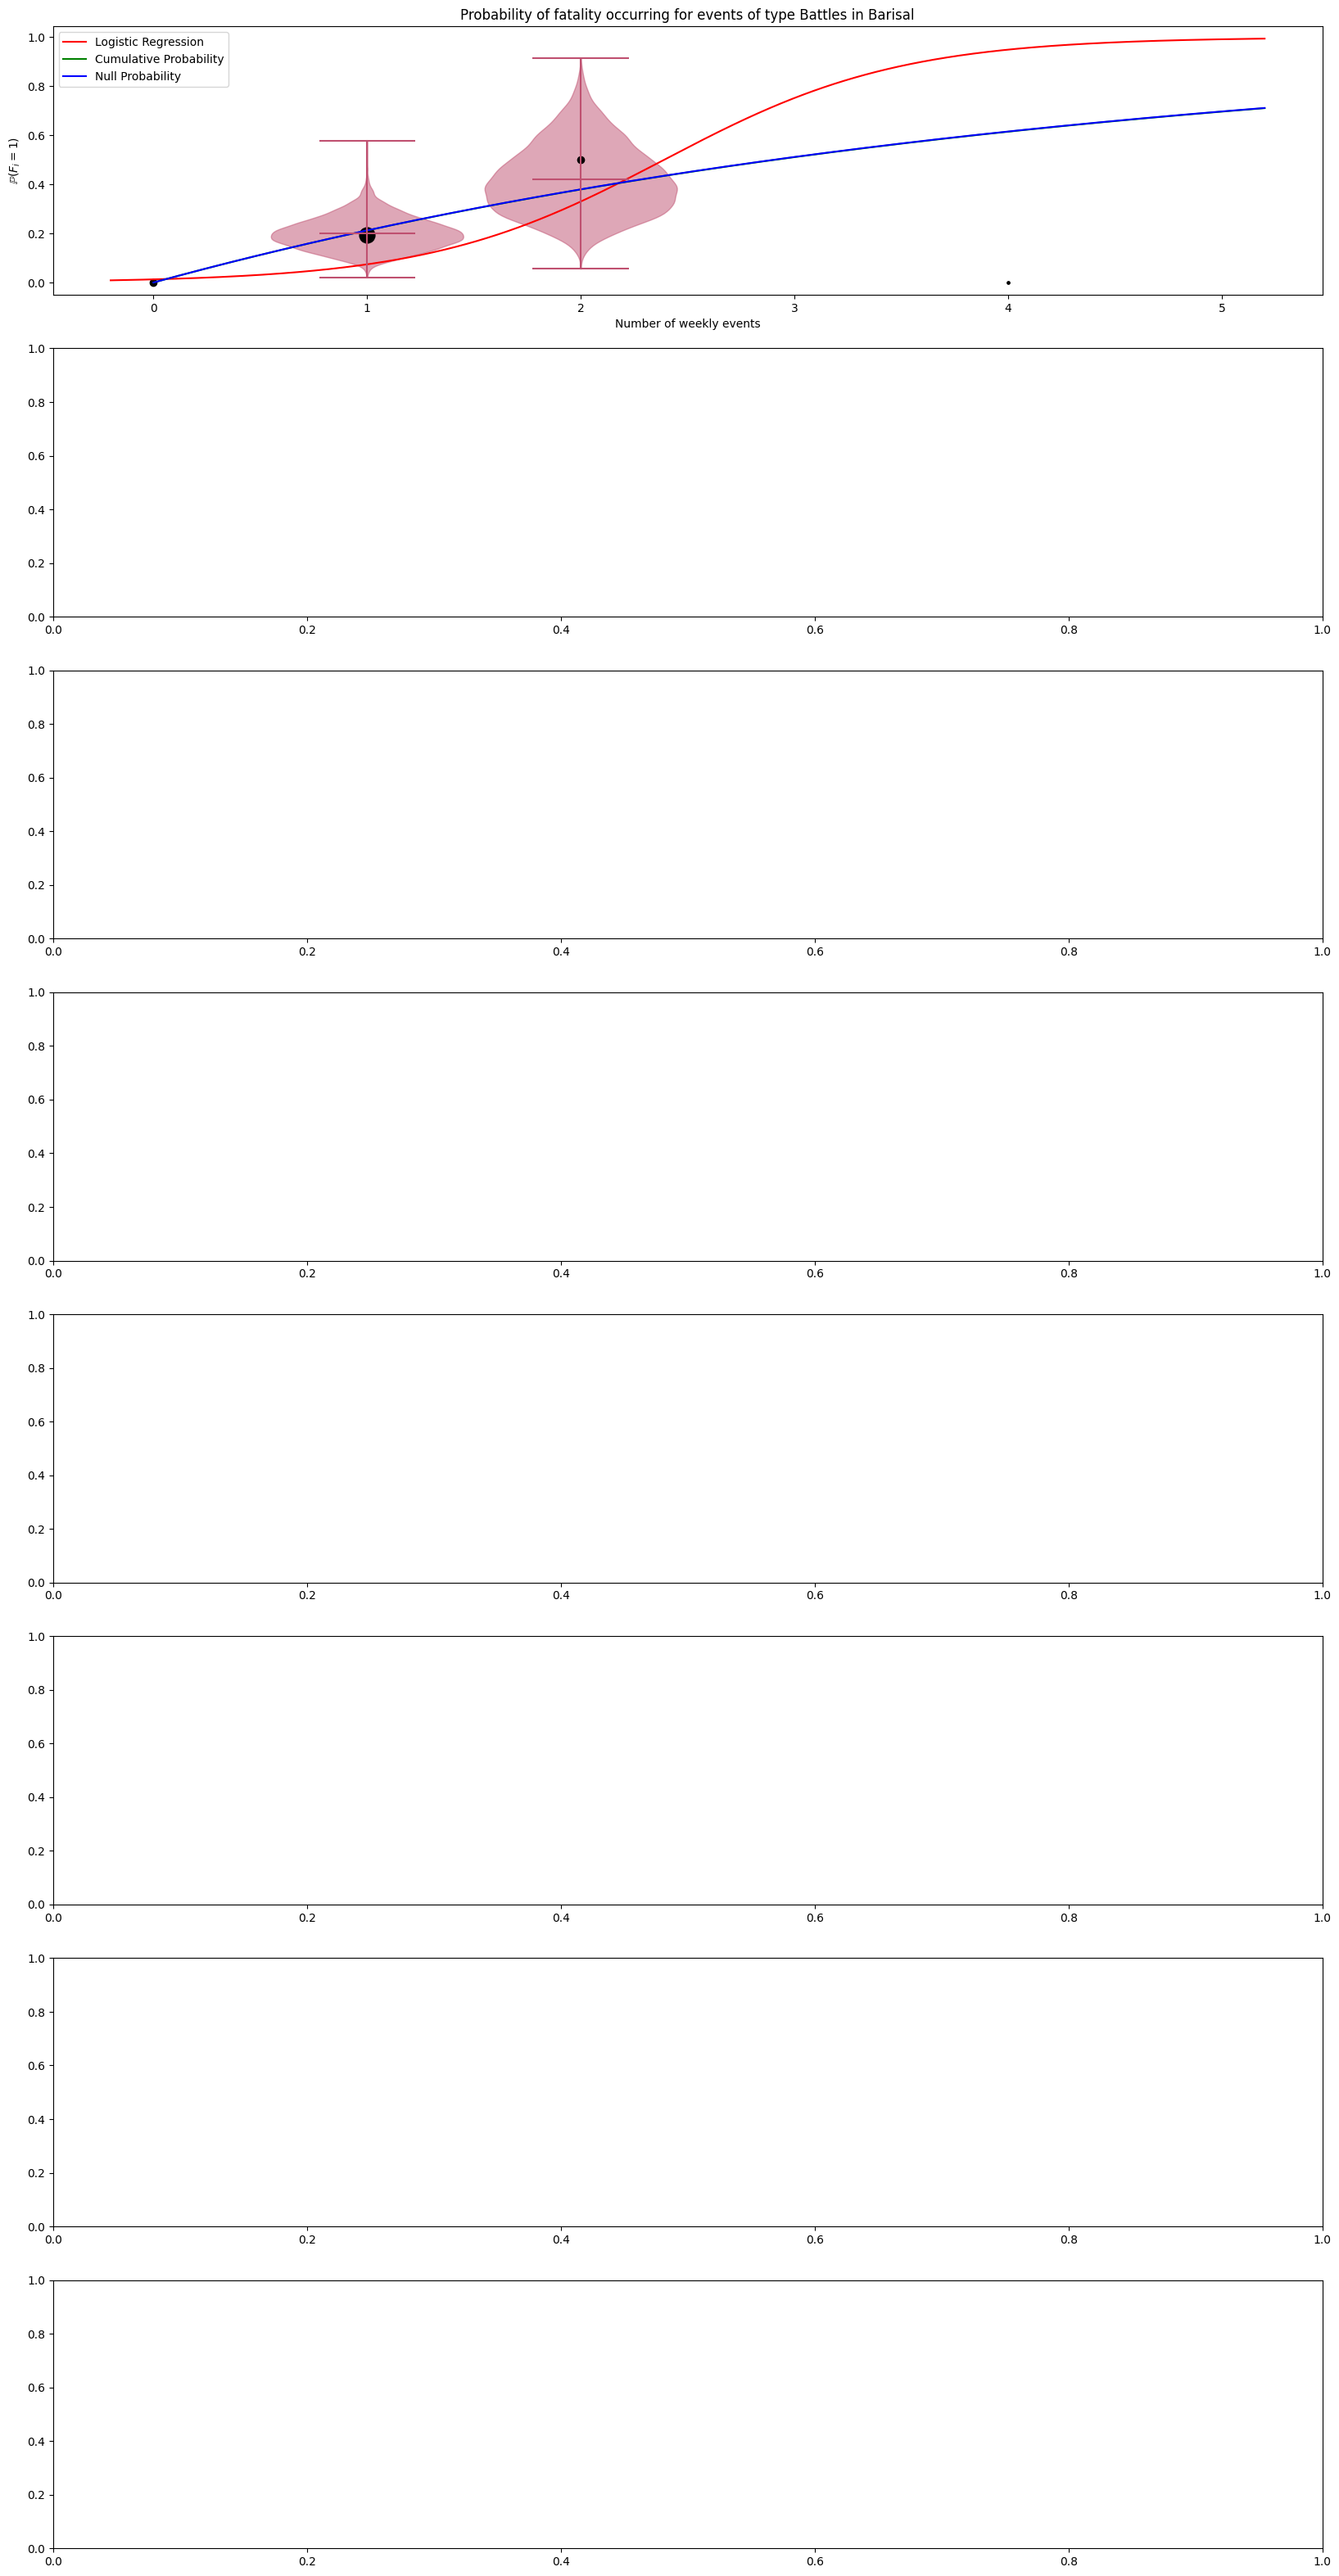

In [9]:
axis_upper_limits = [5, 6, 12, 5]
weekly_data = data.groupby(['WEEK', 'EVENT_TYPE', 'ADMIN1'], as_index=False)[['RAW_COUNTS', 'FATALITIES']].sum()

for event_idx, event in enumerate(violent_events):
    fig, ax = plt.subplots(8, figsize=(20, 40))
    color = event_colours[event]
    for div_idx, division in enumerate(divisions):
        data_filter = {'ADMIN1':division, 'EVENT_TYPE':event}
        event_loc_data = weekly_data.loc[weekly_data['ADMIN1'] == division].loc[weekly_data['EVENT_TYPE'] == event]
        max_bin = auto_max_bin(data, data_filter, bin_size=0.1)
        mod4_param_names = ['pK']
        mod4_param_names.extend([f'p.{k}' for k in reversed(range(1, max_bin))])

        mod1_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan')[1][['alpha', 'beta_']].values
        mod1a_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan', ignore_zero=True)[1][['alpha', 'beta_']].values
        mod4_samples = model_sample(4, data, data_filter, stan_filepath='stan_files/model4.stan', max_bin=max_bin)[1][mod4_param_names].values
        mod4_samples = mod4_samples[:, ::-1]
        mod6_samples = model_sample(6, data, data_filter, stan_filepath='stan_files/model6.stan')[1]['p'].values
        null_samples = model_sample('null', data, data_filter)['p.1'].values

        mod1_mean = np.mean(mod1_samples, axis=0)
        mod1a_mean = np.mean(mod1a_samples, axis=0)
        mod4_mean = np.mean(mod4_samples, axis=0)
        mod6_mean = np.mean(mod6_samples)
        null_mean = np.mean(null_samples)

        count_axis = np.linspace(-0.2, axis_upper_limits[event_idx]+0.2, 1000)
        pos_axis = np.array([count for count in count_axis if count >= 0])

        nonzero_counts = []
        fatality_props = []
        num_obs_counts = []

        for count in range(axis_upper_limits[event_idx] + 1):
            count_data = event_loc_data.loc[event_loc_data['RAW_COUNTS'] == count]
            if len(count_data) > 0:
                zero_fatal = len(count_data.loc[count_data['FATALITIES'] == 0])
                with_fatal = len(count_data.loc[count_data['FATALITIES'] > 0])
                fatal_prop = with_fatal / (zero_fatal + with_fatal)
                if count != 0:
                    fatality_props.append(fatal_prop)
                    nonzero_counts.append(count)
                    num_obs_counts.append(with_fatal+zero_fatal)
                else:
                    ax[div_idx].plot(count, fatal_prop, 'ko')
        
        for count, fatal_prop, num_obs in zip(nonzero_counts, fatality_props, num_obs_counts):
            ax[div_idx].plot(count, fatal_prop, 'ko', markersize=5*len(num_obs_counts)*(num_obs/np.sum(num_obs_counts))**(1/2))

        mod1_probs = [single_logit(count, mod1_mean) for count in count_axis]
        mod6_probs = [1-(1-mod6_mean)**count for count in pos_axis]
        null_probs = [1-(1-null_mean)**count for count in pos_axis]

        ax[div_idx].plot(count_axis, mod1_probs, c='r', label='Logistic Regression')
        ax[div_idx].plot(pos_axis, mod6_probs, c='g', label='Cumulative Probability')
        ax[div_idx].plot(pos_axis, null_probs, c='b', label='Null Probability')
        fig, ax[div_idx] = posterior_probability_plot(4, mod4_samples, box=False, color=color, ax=ax[div_idx], fig=fig)

        ax[div_idx].set(title=f'Probability of fatality occurring for events of type {event} in {division}',
                        xlabel='Number of weekly events',
                        ylabel=r'$\mathbb{P}(F_i=1)$')

        ax[div_idx].legend(loc='upper left')

        new_main_frame = [event, division, mod1_mean[0], mod1_mean[1], mod6_mean, null_mean]
        new_mod4_frame = [event, division]

        new_mod4_frame.extend(mod4_mean)
        while len(new_mod4_frame) < len(mod4_frame_cols):
            new_mod4_frame.append(0)
        
        main_frame.loc[len(main_frame)] = new_main_frame
        mod4_frame.loc[len(mod4_frame)] = new_mod4_frame

        print(f'\n\nlocation {division} complete for event {event}\n\n')

    plt.tight_layout()
    print(f'event {event} completed')
        
plt.show()

In [90]:
main_frame_cols = ['Event', 'Division', 'alpha', 'beta', 'alpha (ignore 0)', 'beta (ignore 0)', 'p', 'p.1']
mod4_frame_cols = ['Event', 'Division']
mod4_frame_cols.extend([f'p.{i}' for i in range(1, 13)])
marg_frame_cols = ['Event', 'Division', 'Logistic', 'Logistic-ignore zero', 'Discretisation', 'Cumulative', 'Null']

main_frame = pd.DataFrame(columns=main_frame_cols)
mod4_frame = pd.DataFrame(columns=mod4_frame_cols)
marg_frame = pd.DataFrame(columns=marg_frame_cols)

In [68]:
axis_upper_limits = [5, 6, 12, 5]main_frame

Empty DataFrame
Columns: [Event, Division, alpha, beta, alpha (ignore 0), beta (ignore 0), p, p.1]
Index: []

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000161 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000124 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000159 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000144 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.44 seconds.
  Adjust your expectations accordingly!


KeyboardInterrupt: 

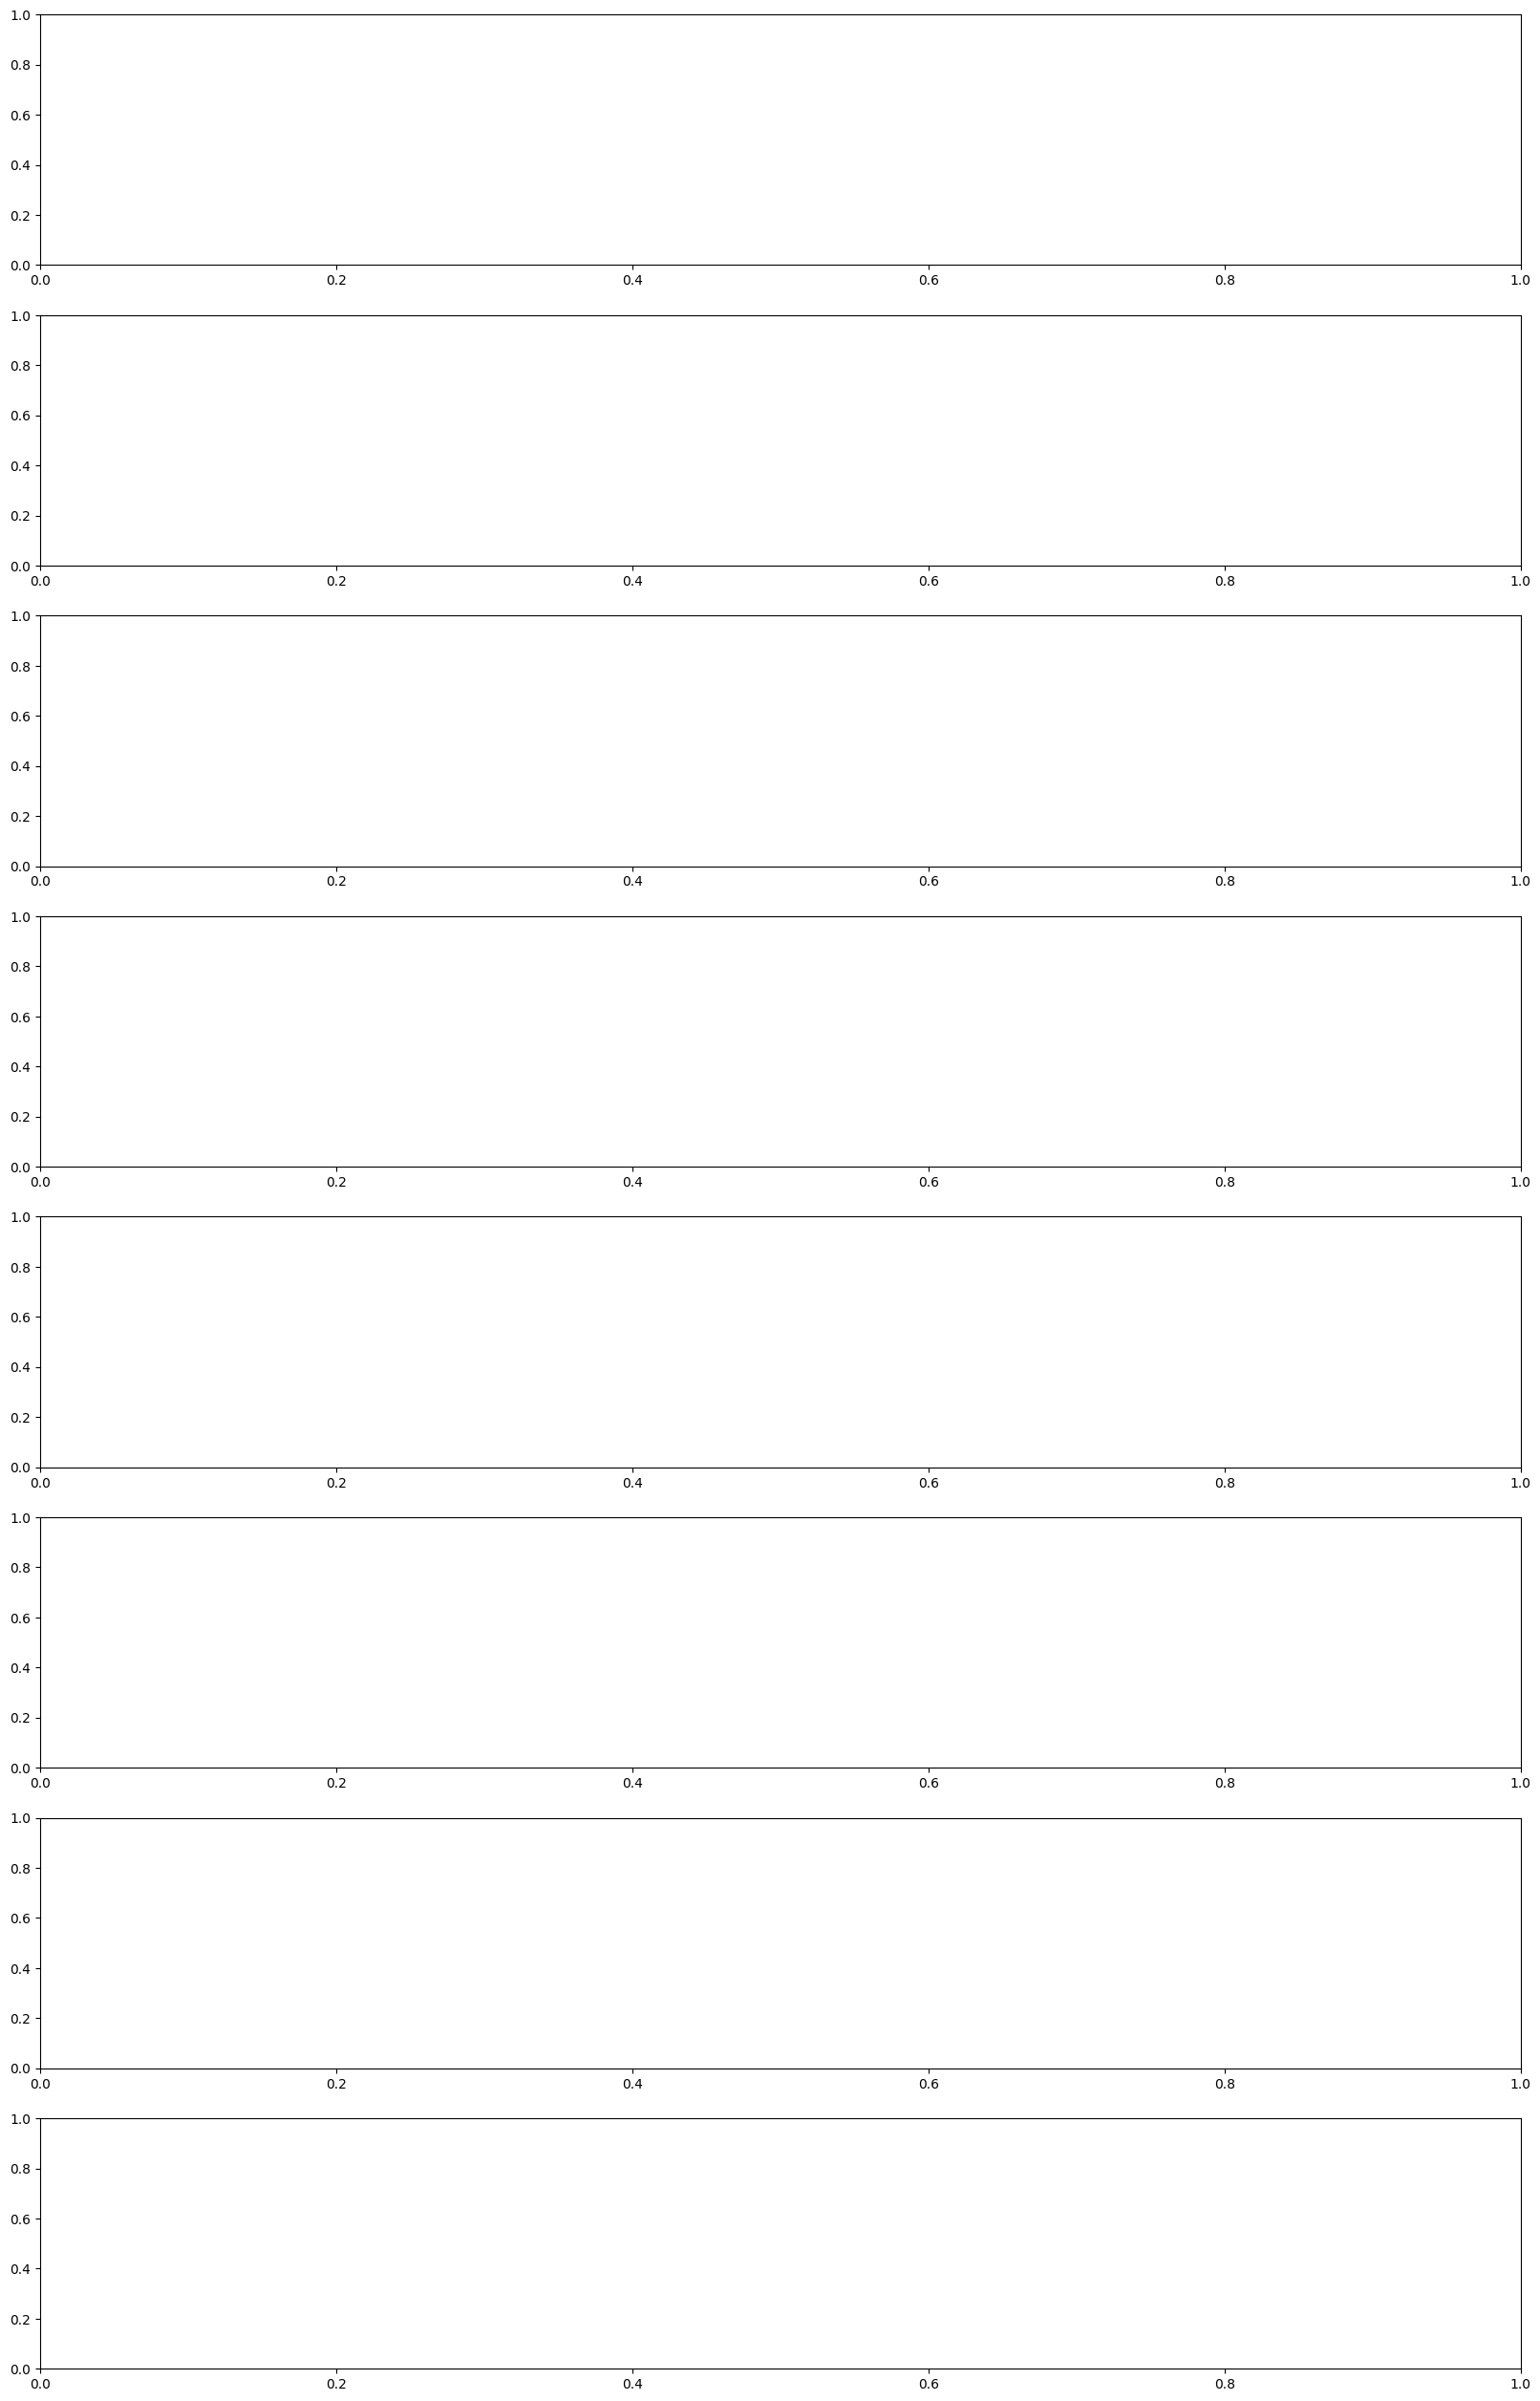

In [11]:
main_frame_cols = ['Event', 'Division', 'alpha', 'beta', 'alpha (ignore 0)', 'beta (ignore 0)', 'p', 'p.1']
mod4_frame_cols = ['Event', 'Division']
mod4_frame_cols.extend([f'p.{i}' for i in range(1, 13)])
marg_frame_cols = ['Event', 'Division', 'Logistic', 'Logistic-ignore zero', 'Discretisation', 'Cumulative', 'Null']

main_frame = pd.DataFrame(columns=main_frame_cols)
mod4_frame = pd.DataFrame(columns=mod4_frame_cols)
marg_frame = pd.DataFrame(columns=marg_frame_cols)

axis_upper_limits = [5, 6, 12, 5]

for event_idx, event in enumerate(violent_events):
    fig, ax = plt.subplots(8, figsize=(20, 32))
    color = event_colours[event]
    for div_idx, division in enumerate(divisions):
        data_filter = {'ADMIN1':division, 'EVENT_TYPE':event}
        max_bin = auto_max_bin(data, data_filter, bin_size=0.1)
        mod4_param_names = ['pK']
        mod4_param_names.extend([f'p.{k}' for k in reversed(range(1, max_bin))])

        mod1_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan')[1][['alpha', 'beta_']].values
        mod1a_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan', ignore_zero=True)[1][['alpha', 'beta_']].values
        mod4_samples = model_sample(4, data, data_filter, stan_filepath='stan_files/model4.stan', max_bin=max_bin)[1][mod4_param_names].values
        mod4_samples = mod4_samples[:, ::-1]
        mod6_samples = model_sample(6, data, data_filter, stan_filepath='stan_files/model6.stan')[1]['p'].values
        null_samples = model_sample('null', data, data_filter)['p.1'].values

        mod1_mean = np.mean(mod1_samples, axis=0)
        mod1a_mean = np.mean(mod1a_samples, axis=0)
        mod4_mean = np.mean(mod4_samples, axis=0)
        mod6_mean = np.mean(mod6_samples)
        null_mean = np.mean(null_samples)

        mod1_resp, mod1_covs = model_observations(1, data, data_filter, ignore_zero=True)
        mod1a_resp, mod1a_covs = model_observations(1, data, data_filter, ignore_zero=True)
        mod4_resp, mod4_covs = model_observations(4, data, data_filter, max_bin=max_bin, ignore_zero=True)
        mod6_resp, mod6_covs = model_observations(6, data, data_filter, ignore_zero=True)
        null_resp, null_covs = model_observations(6, data, data_filter, ignore_zero=True)

        mod1_marg = nr4_marginal_likelihood(mod1_samples, logit_ll, mod1_resp, mod1_covs, error=0.01)
        print('found model 1 marg liks')
        mod1a_marg = nr4_marginal_likelihood(mod1a_samples, logit_ll, mod1a_resp, mod1a_covs, error=0.01)
        print('found model 1a marg liks')
        mod4_marg = nr4_marginal_likelihood(mod4_samples, mod4_llh, mod4_resp, mod4_covs, error=0.01)
        print('found model 4 marg liks')
        mod6_marg = nr4_marginal_likelihood(mod6_samples, mod6_llh, mod6_resp, mod6_covs, error=0.01)
        print('found model 6 marg liks')
        null_marg = nr4_marginal_likelihood(null_samples, mod6_llh, null_resp, null_covs, error=0.01)
        print('found null model marg liks')

        count_axis = np.linspace(-0.2, axis_upper_limits[event_idx]+0.2, 1000)
        pos_axis = np.array([count for count in count_axis if count >= 0])

        nonzero_counts = []
        fatality_props = []
        num_obs_counts = []

        for count in range(axis_upper_limits[event_idx] + 1):
            count_data = event_loc_data.loc[event_loc_data['RAW_COUNTS'] == count]
            if len(count_data) > 0:
                zero_fatal = len(count_data.loc[count_data['FATALITIES'] == 0])
                with_fatal = len(count_data.loc[count_data['FATALITIES'] > 0])
                fatal_prop = with_fatal / (zero_fatal + with_fatal)
                if count != 0:
                    fatality_props.append(fatal_prop)
                    nonzero_counts.append(count)
                    num_obs_counts.append(with_fatal+zero_fatal)
                else:
                    ax[div_idx].plot(count, fatal_prop, 'ko')
        
        for count, fatal_prop, num_obs in zip(nonzero_counts, fatality_props, num_obs_counts):
            ax[div_idx].plot(count, fatal_prop, 'ko', markersize=5*len(num_obs_counts)*(num_obs/np.sum(num_obs_counts))**(1/2))

        mod1_probs = [single_logit(count, mod1_mean) for count in count_axis]
        mod1a_probs = [single_logit(count, mod1a_mean) for count in count_axis]
        mod6_probs = [1-(1-mod6_mean)**count for count in pos_axis]
        null_probs = [1-(1-null_mean)**count for count in pos_axis]

        ax[div_idx].plot(count_axis, mod1_probs, c='r', label='Logistic Regression')
        ax[div_idx].plot(count_axis, mod1a_probs, c='orange', label='Logistic Regression\n  (ignoring 0)')
        ax[div_idx].plot(pos_axis, mod6_probs, c='g', label='Discretisation')
        ax[div_idx].plot(pos_axis, null_probs, c='b', label='Cumulative Probability')
        fig, ax[div_idx] = posterior_probability_plot(4, mod4_samples, box=False, color=color, ax=ax[div_idx], fig=fig)

        ax[div_idx].set(title=f'Probability of fatality occurring for events of type {event} in {division}',
                        xlabel='Number of weekly events',
                        ylabel=r'$\mathbb{P}(F_i=1)$')

        ax[div_idx].legend(loc='upper left')

        new_main_frame = [event, division, mod1_mean[0], mod1_mean[1], mod1a_mean[0], mod1a_mean[1], mod6_mean, null_mean]
        new_marg_frame = [event, division, mod1_marg, mod1a_marg, mod4_marg, mod6_marg, null_marg]
        new_mod4_frame = [event, division]

        new_mod4_frame.extend(mod4_mean)
        while len(new_mod4_frame) < len(mod4_frame_cols):
            new_mod4_frame.append(0)
        
        main_frame.loc[len(main_frame)] = new_main_frame
        mod4_frame.loc[len(mod4_frame)] = new_mod4_frame
        marg_frame.loc[len(marg_frame)] = new_marg_frame

        print(f'\n\nlocation {division} complete for event {event}\n\n')
        
    plt.tight_layout()
    print(f'event {event} completed')
        
plt.tight_layout()
plt.show()

In [73]:
marg_frame

Event    Division    Logistic  Logistic-ignore zero  \
0                      Battles     Barisal  -34.595535            -21.892506   
1                      Battles  Chittagong -200.901374           -151.343564   
2                      Battles       Dhaka -180.986828           -147.266167   
3                      Battles      Khulna -166.503673           -137.821235   
4                      Battles  Mymensingh  -48.730396            -30.115803   
5                      Battles    Rajshahi -133.878592           -106.912971   
6                      Battles     Rangpur  -62.300470            -44.027700   
7                      Battles      Sylhet -121.707456            -94.603789   
8   Explosions/Remote violence     Barisal   -6.149026             -1.010993   
9   Explosions/Remote violence  Chittagong  -28.033583            -13.645305   
10  Explosions/Remote violence       Dhaka  -60.032911            -30.877944   
11  Explosions/Remote violence      Khulna  -54.363824            -33.349899   
12  Explosions/Remote violence  Mymensingh   -6.108972             -0.568008   
13  Explosions/Remote violence    Rajshahi  -24.119546            -16.203325   
14  Explosions/Remote violence     Rangpur  -14.013763             -2.201810   
15  Explosions/Remote violence      Sylhet  -13.929028             -2.201810   
16                       Riots     Barisal -151.784780           -121.338515   
17                       Riots  Chittagong -321.151546           -281.614919   
18                       Riots       Dhaka -374.674111           -338.660425   
19                       Riots      Khulna -311.884087           -255.044070   
20                       Riots  Mymensingh -163.301060           -101.488917   
21                       Riots    Rajshahi -277.047245           -232.098923   
22                       Riots     Rangpur -228.721534           -182.248280   
23                       Riots      Sylhet -234.605240           -191.704147   
24  Violence against civilians     Barisal -105.859125            -78.799603   
25  Violence against civilians  Chittagong -197.360862           -163.876108   
26  Violence against civilians       Dhaka -226.009972           -189.443442   
27  Violence against civilians      Khulna -248.779374           -181.767034   
28  Violence against civilians  Mymensingh  -63.025344            -44.407872   
29  Violence against civilians    Rajshahi -204.138879           -167.825888   
30  Violence against civilians     Rangpur -170.165268           -132.872193   
31  Violence against civilians      Sylhet -119.659031            -94.605746   

    Discretisation  Cumulative        Null  
0       -25.672690  -21.104219  -21.447015  
1      -170.632943 -153.946450 -159.532593  
2      -202.852102 -145.688389 -146.703315  
3      -206.298914 -136.262450 -139.193456  
4       -29.902739  -31.032910  -31.495035  
5      -145.319310 -106.399399 -107.026753  
6       -53.480641  -44.048372  -44.472440  
7      -113.012705  -94.634546  -95.996159  
8        -0.890727   -0.881326   -0.876319  
9       -13.920098  -14.657749  -15.252714  
10      -41.436759  -34.367766  -40.167532  
11      -43.040182  -34.874680  -36.476127  
12       -0.541319   -0.518861   -0.540200  
13      -16.000243  -15.172176  -15.211709  
14       -2.234844   -2.248284   -2.237679  
15       -2.249893   -2.242430   -2.237679  
16     -197.089935 -125.558059 -138.526583  
17     -874.811834 -286.591084 -326.784272  
18    -1480.862210 -352.031654 -419.416513  
19     -638.455846 -270.924556 -315.791195  
20     -177.640534 -116.741119 -138.158856  
21     -754.013801 -240.005750 -281.555241  
22     -331.462290 -185.443898 -196.915094  
23     -347.456906 -193.617114 -204.668076  
24      -92.216147  -78.817268  -79.450267  
25     -213.963524 -162.964748 -163.562542  
26     -260.287395 -188.169333 -189.187083  
27     -230.667406 -188.769241 -199.522622  
28      -48.704993  -44.423797  -44.610924  
29     -219.285452 -167.343408 -16

In [92]:
marg_frame_drop = marg_frame.drop(['Event', 'Division'], axis=1)
marg_frame['Preferred Model'] = marg_frame_drop.idxmax(axis=1)
marg_frame['Evidence'] = marg_frame_drop.apply(lambda row: sorted(row, reverse=True)[:2][0] - sorted(row, reverse=True)[:2][1], axis=1)
marg_frame.to_csv('marg_liks_extended.csv')

In [101]:
main_frame

Event    Division     alpha      beta  \
0                      Battles     Barisal -4.341180  1.816999   
1                      Battles  Chittagong -2.825588  1.894087   
2                      Battles       Dhaka -3.035734  2.061178   
3                      Battles      Khulna -3.165950  2.127789   
4                      Battles  Mymensingh -4.111953  3.847243   
5                      Battles    Rajshahi -3.424020  2.807353   
6                      Battles     Rangpur -4.032998  3.018663   
7                      Battles      Sylhet -3.481060  1.821451   
8   Explosions/Remote violence     Barisal -4.919733 -0.039463   
9   Explosions/Remote violence  Chittagong -4.385808  2.350467   
10  Explosions/Remote violence       Dhaka -3.829442  0.877868   
11  Explosions/Remote violence      Khulna -4.019021  1.362650   
12  Explosions/Remote violence  Mymensingh -4.923878  0.009524   
13  Explosions/Remote violence    Rajshahi -4.507699  2.604982   
14  Explosions/Remote violence     Rangpur -4.625806  1.762803   
15  Explosions/Remote violence      Sylhet -4.638245  1.781318   
16                       Riots     Barisal -2.899476  0.346375   
17                       Riots  Chittagong -1.707414  0.276047   
18                       Riots       Dhaka -1.159716  0.126546   
19                       Riots      Khulna -1.775108  0.349755   
20                       Riots  Mymensingh -2.809412  0.746040   
21                       Riots    Rajshahi -1.992359  0.289032   
22                       Riots     Rangpur -2.432541  0.654403   
23                       Riots      Sylhet -2.416945  0.567437   
24  Violence against civilians     Barisal -3.638407  2.589207   
25  Violence against civilians  Chittagong -2.744230  3.027598   
26  Violence against civilians       Dhaka -2.657195  2.128696   
27  Violence against civilians      Khulna -2.212975  2.133034   
28  Violence against civilians  Mymensingh -3.992890  4.390368   
29  Violence against civilians    Rajshahi -2.828178  2.644586   
30  Violence against civilians     Rangpur -3.129558  2.756627   
31  Violence against civilians      Sylhet -3.597226  3.044307   

    alpha (ignore 0)  beta (ignore 0)         p       p.1  
0          -0.906762        -0.144514  0.212153  0.212571  
1          -0.343518         0.401583  0.438952  0.508061  
2          -1.003162         0.818641  0.435491  0.421664  
3          -1.138461         0.956206  0.449666  0.411298  
4           0.406492         0.026645  0.577634  0.619401  
5          -0.851573         0.976614  0.517453  0.518240  
6          -0.390698         0.165433  0.409684  0.438671  
7          -1.164762         0.451976  0.293043  0.324471  
8          -0.711302        -0.718733  0.200124  0.199580  
9          -0.071268        -0.588179  0.321571  0.381286  
10         -0.361068        -0.467320  0.193016  0.307911  
11         -0.592693        -0.465743  0.192048  0.240524  
12         -0.361166        -0.353856  0.329632  0.334734  
13         -1.067168         0.160099  0.268906  0.250896  
14          0.221567         0.218381  0.598454  0.599933  
15          0.221567         0.218381  0.600505  0.599933  
16         -1.592957         0.023655  0.097101  0.151326  
17         -1.020498         0.162415  0.149966  0.227066  
18         -0.721768         0.082002  0.119354  0.192181  
19         -0.731236         0.117713  0.186324  0.299851  
20         -0.158054        -0.336888  0.223540  0.375253  
21         -1.126810         0.152277  0.141804  0.233122  
22         -1.106112         0.249654  0.208916  0.273145  
23         -1.155202         0.185946  0.179529  0.233395  
24         -0.579796         0.319364  0.397326  0.422954  
25         -0.298791         1.143179  0.677885  0.678665  
26         -0.728523         0.917881  0.523374  0.520167  
27          0.364687         0.487009  0.607915  0.695288  
28          0.327123         0.626995  0.694753  0.701323  
29         -0.526720         0.981093  0.58868

In [93]:
marg_frame

Event    Division    Logistic  Logistic-ignore zero  \
0                      Battles     Barisal  -25.958683            -21.892506   
1                      Battles  Chittagong -179.774965           -151.343564   
2                      Battles       Dhaka -163.884616           -147.266167   
3                      Battles      Khulna -151.066764           -137.821235   
4                      Battles  Mymensingh  -37.763014            -30.115803   
5                      Battles    Rajshahi -119.688544           -106.912971   
6                      Battles     Rangpur  -51.369259            -44.027700   
7                      Battles      Sylhet -107.834406            -94.603789   
8   Explosions/Remote violence     Barisal   -0.029950             -1.010993   
9   Explosions/Remote violence  Chittagong  -19.340389            -13.645305   
10  Explosions/Remote violence       Dhaka  -48.276406            -30.877944   
11  Explosions/Remote violence      Khulna  -44.100701            -33.349899   
12  Explosions/Remote violence  Mymensingh   -0.010805             -0.568008   
13  Explosions/Remote violence    Rajshahi  -16.069045            -16.203325   
14  Explosions/Remote violence     Rangpur   -6.840889             -2.201810   
15  Explosions/Remote violence      Sylhet   -6.832102             -2.201810   
16                       Riots     Barisal -133.990770           -121.338515   
17                       Riots  Chittagong -293.355095           -281.614919   
18                       Riots       Dhaka -346.263996           -338.660425   
19                       Riots      Khulna -277.241446           -255.044070   
20                       Riots  Mymensingh -138.834742           -101.488917   
21                       Riots    Rajshahi -247.787332           -232.098923   
22                       Riots     Rangpur -203.160813           -182.248280   
23                       Riots      Sylhet -210.192449           -191.704147   
24  Violence against civilians     Barisal  -92.564870            -78.799603   
25  Violence against civilians  Chittagong -181.041682           -163.876108   
26  Violence against civilians       Dhaka -207.181640           -189.443442   
27  Violence against civilians      Khulna -222.006057           -181.767034   
28  Violence against civilians  Mymensingh  -51.270054            -44.407872   
29  Violence against civilians    Rajshahi -186.532565           -167.825888   
30  Violence against civilians     Rangpur -153.343086           -132.872193   
31  Violence against civilians      Sylhet -106.357939            -94.605746   

    Discretisation  Cumulative        Null       Preferred Model   Evidence  
0       -25.672690  -21.104219  -21.447015            Cumulative   0.342795  
1      -170.632943 -153.946450 -159.532593  Logistic-ignore zero   2.602886  
2      -202.852102 -145.688389 -146.703315            Cumulative   1.014926  
3      -206.298914 -136.262450 -139.193456            Cumulative   1.558785  
4       -29.902739  -31.032910  -31.495035        Discretisation   0.213064  
5      -145.319310 -106.399399 -107.026753            Cumulative   0.513572  
6       -53.480641  -44.048372  -44.472440  Logistic-ignore zero   0.020672  
7      -113.012705  -94.634546  -95.996159  Logistic-ignore zero   0.030757  
8        -0.890727   -0.881326   -0.876319              Logistic   0.846369  
9       -13.920098  -14.657749  -15.252714  Logistic-ignore zero   0.274793  
10      -41.436759  -34.367766  -40.167532  Logistic-ignore zero   3.489822  
11      -43.040182  -34.874680  -36.476127  Logistic-ignore zero   1.524781  
12       -0.541319   -0.518861   -0.540200              Logistic   0.508056  
13      -16.000243  -15.172176  -15.211709            Cumulative   0.039533  
14       -2.234844   -2.248284   -2.237679  Logistic-ignore zero   0.033034  
15       -2.249893   -2.242430   -2.237679  Logistic-ignore zero   0.035869  
16     -197.089935 -125.558059 -138.526583  Logistic-ignor

In [107]:
marg_frame

Event    Division    Logistic  Logistic-ignore zero  \
0                      Battles     Barisal  -25.958683            -21.892506   
1                      Battles  Chittagong -179.774965           -151.343564   
2                      Battles       Dhaka -163.884616           -147.266167   
3                      Battles      Khulna -151.066764           -137.821235   
4                      Battles  Mymensingh  -37.763014            -30.115803   
5                      Battles    Rajshahi -119.688544           -106.912971   
6                      Battles     Rangpur  -51.369259            -44.027700   
7                      Battles      Sylhet -107.834406            -94.603789   
8   Explosions/Remote violence     Barisal   -0.029950             -1.010993   
9   Explosions/Remote violence  Chittagong  -19.340389            -13.645305   
10  Explosions/Remote violence       Dhaka  -48.276406            -30.877944   
11  Explosions/Remote violence      Khulna  -44.100701            -33.349899   
12  Explosions/Remote violence  Mymensingh   -0.010805             -0.568008   
13  Explosions/Remote violence    Rajshahi  -16.069045            -16.203325   
14  Explosions/Remote violence     Rangpur   -6.840889             -2.201810   
15  Explosions/Remote violence      Sylhet   -6.832102             -2.201810   
16                       Riots     Barisal -133.990770           -121.338515   
17                       Riots  Chittagong -293.355095           -281.614919   
18                       Riots       Dhaka -346.263996           -338.660425   
19                       Riots      Khulna -277.241446           -255.044070   
20                       Riots  Mymensingh -138.834742           -101.488917   
21                       Riots    Rajshahi -247.787332           -232.098923   
22                       Riots     Rangpur -203.160813           -182.248280   
23                       Riots      Sylhet -210.192449           -191.704147   
24  Violence against civilians     Barisal  -92.564870            -78.799603   
25  Violence against civilians  Chittagong -181.041682           -163.876108   
26  Violence against civilians       Dhaka -207.181640           -189.443442   
27  Violence against civilians      Khulna -222.006057           -181.767034   
28  Violence against civilians  Mymensingh  -51.270054            -44.407872   
29  Violence against civilians    Rajshahi -186.532565           -167.825888   
30  Violence against civilians     Rangpur -153.343086           -132.872193   
31  Violence against civilians      Sylhet -106.357939            -94.605746   

    Discretisation  Cumulative        Null       Preferred Model   Evidence  
0       -25.672690  -21.104219  -21.447015            Cumulative   0.342795  
1      -170.632943 -153.946450 -159.532593  Logistic-ignore zero   2.602886  
2      -202.852102 -145.688389 -146.703315            Cumulative   1.014926  
3      -206.298914 -136.262450 -139.193456            Cumulative   1.558785  
4       -29.902739  -31.032910  -31.495035        Discretisation   0.213064  
5      -145.319310 -106.399399 -107.026753            Cumulative   0.513572  
6       -53.480641  -44.048372  -44.472440  Logistic-ignore zero   0.020672  
7      -113.012705  -94.634546  -95.996159  Logistic-ignore zero   0.030757  
8        -0.890727   -0.881326   -0.876319              Logistic   0.846369  
9       -13.920098  -14.657749  -15.252714  Logistic-ignore zero   0.274793  
10      -41.436759  -34.367766  -40.167532  Logistic-ignore zero   3.489822  
11      -43.040182  -34.874680  -36.476127  Logistic-ignore zero   1.524781  
12       -0.541319   -0.518861   -0.540200              Logistic   0.508056  
13      -16.000243  -15.172176  -15.211709            Cumulative   0.039533  
14       -2.234844   -2.248284   -2.237679  Logistic-ignore zero   0.033034  
15       -2.249893   -2.242430   -2.237679  Logistic-ignore zero   0.035869  
16     -197.089935 -125.558059 -138.526583  Logistic-ignor

# The cell below is the one for the graphs for the report

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000161 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000124 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000159 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000144 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.44 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.68 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.68 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000136 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.75 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.001089 seconds
  1000 transitions using 10 leapfrog steps per transition would take 10.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.93 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000159 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.82 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000323 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000105 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.9 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.0002 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000362 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000125 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.68 seconds.
  Adjust your expectations accordingly!


KeyboardInterrupt: 

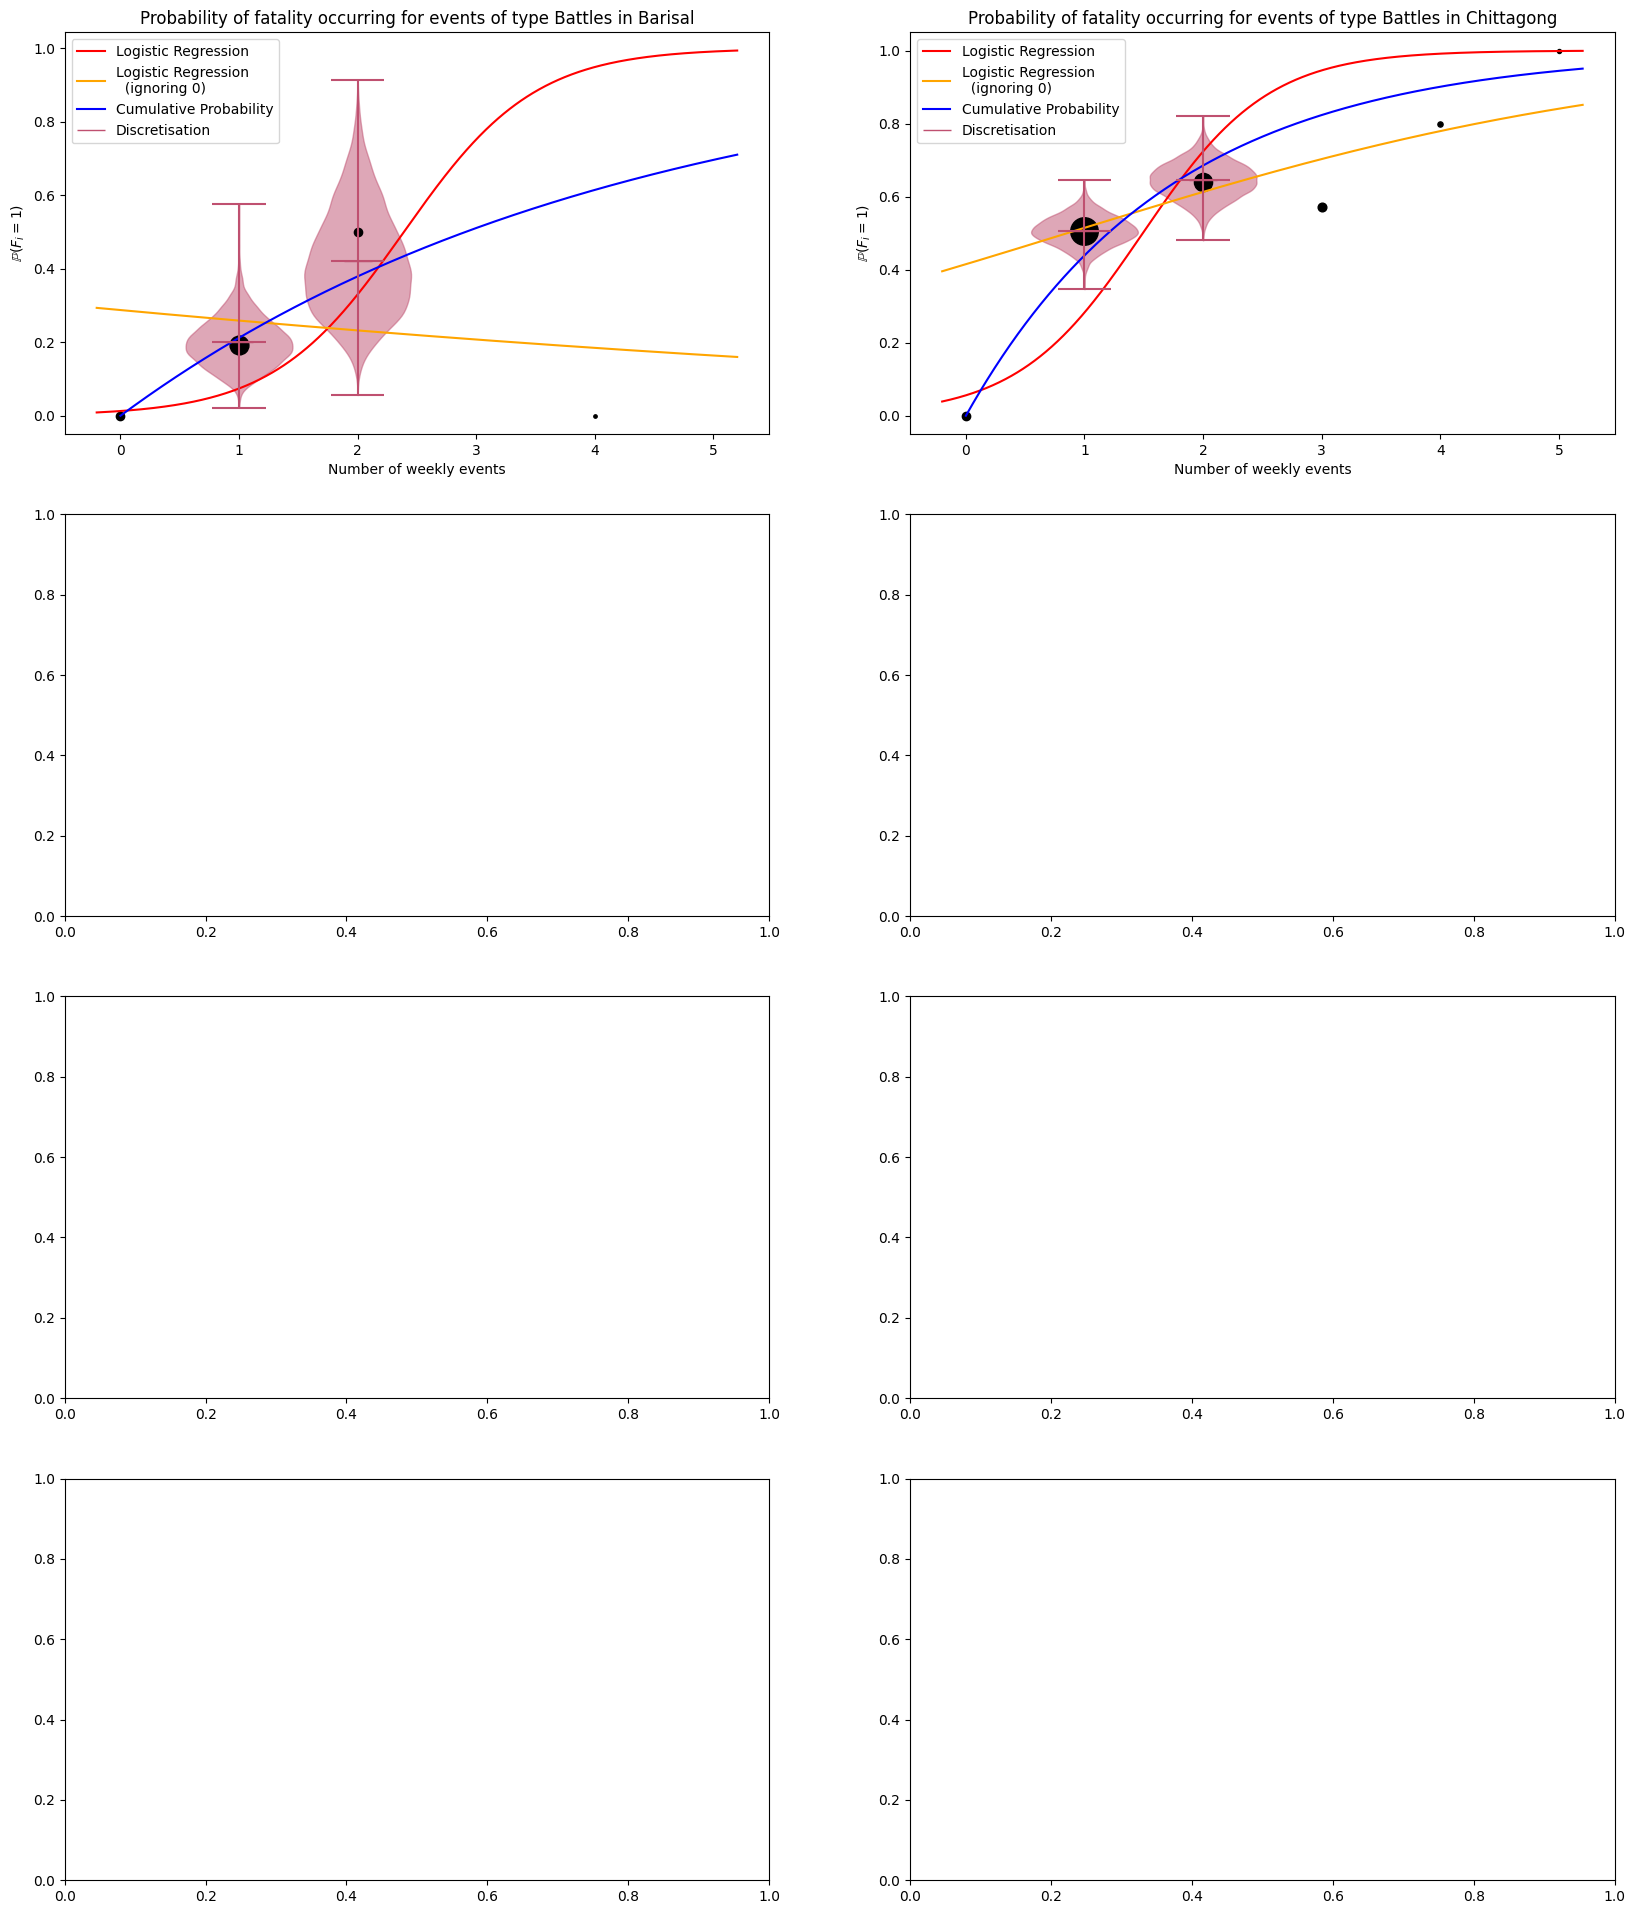

In [19]:
axis_upper_limits = [5, 6, 12, 5]

for event_idx, event in enumerate(violent_events):
    fig, ax = plt.subplots(4, 2, figsize=(20, 24))
    color = event_colours[event]
    for div_idx, division in enumerate(divisions):
        event_loc_data = weekly_data.loc[weekly_data['ADMIN1'] == division].loc[weekly_data['EVENT_TYPE'] == event]
        hori_idx = div_idx % 2
        vert_idx = div_idx // 2
        data_filter = {'ADMIN1':division, 'EVENT_TYPE':event}
        max_bin = auto_max_bin(data, data_filter, bin_size=0.1)
        mod4_param_names = ['pK']
        mod4_param_names.extend([f'p.{k}' for k in reversed(range(1, max_bin))])

        mod1_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan')[1][['alpha', 'beta_']].values
        mod1a_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan', ignore_zero=True)[1][['alpha', 'beta_']].values
        mod4_samples = model_sample(4, data, data_filter, stan_filepath='stan_files/model4.stan', max_bin=max_bin)[1][mod4_param_names].values
        mod4_samples = mod4_samples[:, ::-1]
        mod6_samples = model_sample(6, data, data_filter, stan_filepath='stan_files/model6.stan')[1]['p'].values
        # null_samples = model_sample('null', data, data_filter)['p.1'].values

        mod1_mean = np.mean(mod1_samples, axis=0)
        mod1a_mean = np.mean(mod1a_samples, axis=0)
        mod4_mean = np.mean(mod4_samples, axis=0)
        mod6_mean = np.mean(mod6_samples)
        # null_mean = np.mean(null_samples)

        count_axis = np.linspace(-0.2, axis_upper_limits[event_idx]+0.2, 1000)
        pos_axis = np.array([count for count in count_axis if count >= 0])

        nonzero_counts = []
        fatality_props = []
        num_obs_counts = []

        for count in range(axis_upper_limits[event_idx] + 1):
            count_data = event_loc_data.loc[event_loc_data['RAW_COUNTS'] == count]
            if len(count_data) > 0:
                zero_fatal = len(count_data.loc[count_data['FATALITIES'] == 0])
                with_fatal = len(count_data.loc[count_data['FATALITIES'] > 0])
                fatal_prop = with_fatal / (zero_fatal + with_fatal)
                if count != 0:
                    fatality_props.append(fatal_prop)
                    nonzero_counts.append(count)
                    num_obs_counts.append(with_fatal+zero_fatal)
                else:
                    ax[vert_idx, hori_idx].plot(count, fatal_prop, 'ko')
        
        for count, fatal_prop, num_obs in zip(nonzero_counts, fatality_props, num_obs_counts):
            ax[vert_idx, hori_idx].plot(count, fatal_prop, 'ko', markersize=5*len(num_obs_counts)*(num_obs/np.sum(num_obs_counts))**(1/2))

        mod1_probs = [single_logit(count, mod1_mean) for count in count_axis]
        mod1a_probs = [single_logit(count, mod1a_mean) for count in count_axis]
        mod6_probs = [1-(1-mod6_mean)**count for count in pos_axis]
        # null_probs = [1-(1-null_mean)**count for count in pos_axis]

        ax[vert_idx, hori_idx].plot(count_axis, mod1_probs, c='r', label='Logistic Regression')
        ax[vert_idx, hori_idx].plot(count_axis, mod1a_probs, c='orange', label='Logistic Regression\n  (ignoring 0)')
        ax[vert_idx, hori_idx].plot(pos_axis, mod6_probs, c='b', label='Cumulative Probability')
        # ax[vert_idx, hori_idx].plot(pos_axis, null_probs, c='b', label='Null Model')
        ax[vert_idx, hori_idx].plot(range(1, len(mod4_mean) + 1), mod4_mean, color=color, marker='_', markersize=20, label='Discretisation', linestyle='None')
        fig, ax[vert_idx, hori_idx] = posterior_probability_plot(4, mod4_samples, box=False, color=color, ax=ax[vert_idx, hori_idx], fig=fig)

        ax[vert_idx, hori_idx].set(title=f'Probability of fatality occurring for events of type {event} in {division}',
                        xlabel='Number of weekly events',
                        ylabel=r'$\mathbb{P}(F_i=1)$')
        
        ax[vert_idx, hori_idx].legend(loc='best')
        
    plt.tight_layout()
    print(f'event {event} completed')
        
plt.tight_layout()
plt.show()

# Actually also this one for the report

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000416 seconds
  1000 transitions using 10 leapfrog steps per transition would take 4.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000313 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000229 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000146 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000464 seconds
  1000 transitions using 10 leapfrog steps per transition would take 4.64 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001061 seconds
  1000 transitions using 10 leapfrog steps per transition would take 10.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!





location Barisal completed for event Battles



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000189 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.0002 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000223 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000305 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000125 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.0001 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.67 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000404 seconds
  1000 transitions using 10 leapfrog steps per transition would take 4.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000106 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.0001 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!





location Chittagong completed for event Battles



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000207 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000111 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.83 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000251 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.51 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000184 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.84 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000123 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.23 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.83 seconds.
  Adjust your expectations accordingly!





location Dhaka completed for event Battles



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000222 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00011 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.0001 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000122 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
  Adjust your expectations accordingly!





location Khulna completed for event Battles



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.78 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000194 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.94 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!





location Mymensingh completed for event Battles



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.78 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000113 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000118 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.4 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.92 seconds.
  Adjust your expectations accordingly!





location Rajshahi completed for event Battles



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000218 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000112 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.93 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.78 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!





location Rangpur completed for event Battles



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00012 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000178 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.78 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000421 seconds
  1000 transitions using 10 leapfrog steps per transition would take 4.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!





location Sylhet completed for event Battles



event Battles completed
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000113 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.13 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!





location Barisal completed for event Explosions/Remote violence



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000163 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.63 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000133 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.93 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!





location Chittagong completed for event Explosions/Remote violence



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.98 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!





location Dhaka completed for event Explosions/Remote violence



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000135 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000126 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.26 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!





location Khulna completed for event Explosions/Remote violence



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000144 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000103 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.03 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!





location Mymensingh completed for event Explosions/Remote violence



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.95 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!





location Rajshahi completed for event Explosions/Remote violence



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000104 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000119 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!





location Rangpur completed for event Explosions/Remote violence



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 1 bins with parameter names ['pK']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!





location Sylhet completed for event Explosions/Remote violence



event Explosions/Remote violence completed
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.75 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000111 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.9 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000148 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.79 seconds.
  Adjust your expectations accordingly!





location Barisal completed for event Riots



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000546 seconds
  1000 transitions using 10 leapfrog steps per transition would take 5.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000153 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.53 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 8 bins with parameter names ['pK', 'q.7', 'q.6', 'q.5', 'q.4', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000745 seconds
  1000 transitions using 10 leapfrog steps per transition would take 7.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000852 seconds
  1000 transitions using 10 leapfrog steps per transition would take 8.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000272 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000376 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.76 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000109 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000246 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00034 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.4 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00013 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.3 seconds.
  Adjust your expectations accordingly!





location Chittagong completed for event Riots



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.67 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000131 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000104 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 12 bins with parameter names ['pK', 'q.11', 'q.10', 'q.9', 'q.8', 'q.7', 'q.6', 'q.5', 'q.4', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000928 seconds
  1000 transitions using 10 leapfrog steps per transition would take 9.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001206 seconds
  1000 transitions using 10 leapfrog steps per transition would take 12.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001394 seconds
  1000 transitions using 10 leapfrog steps per transition would take 13.94 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000932 seconds
  1000 transitions using 10 leapfrog steps per transition would take 9.32 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000251 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.51 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000173 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.73 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00016 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.6 seconds.
  Adjust your expectations accordingly!
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 0.000389 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.89 seconds.
  Adjust your expectations accordingly!





location Dhaka completed for event Riots



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000163 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.63 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.77 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 6 bins with parameter names ['pK', 'q.5', 'q.4', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.00019 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.9 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000185 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000123 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000138 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.38 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000145 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000174 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000112 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.12 seconds.
  Adjust your expectations accordingly!





location Khulna completed for event Riots



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000154 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000668 seconds
  1000 transitions using 10 leapfrog steps per transition would take 6.68 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!





location Mymensingh completed for event Riots



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000111 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000154 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.54 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.92 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.86 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 8 bins with parameter names ['pK', 'q.7', 'q.6', 'q.5', 'q.4', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000311 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000149 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000146 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000289 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.89 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000122 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.88 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.93 seconds.
  Adjust your expectations accordingly!





location Rajshahi completed for event Riots



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000219 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 4 bins with parameter names ['pK', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.00011 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000161 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.83 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.75 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
  Adjust your expectations accordingly!





location Rangpur completed for event Riots



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 4 bins with parameter names ['pK', 'q.3', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.91 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.86 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.95 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.92 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!





location Sylhet completed for event Riots



event Riots completed
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!





location Barisal completed for event Violence against civilians



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000131 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.31 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000143 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000154 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000118 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000133 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000479 seconds
  1000 transitions using 10 leapfrog steps per transition would take 4.79 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
  Adjust your expectations accordingly!





location Chittagong completed for event Violence against civilians



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000153 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.53 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000106 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000207 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.86 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 8.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.83 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.96 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
  Adjust your expectations accordingly!





location Dhaka completed for event Violence against civilians



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.94 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.96 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.86 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000215 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000174 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000112 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000143 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000143 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.43 seconds.
  Adjust your expectations accordingly!





location Khulna completed for event Violence against civilians



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.94 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.002516 seconds
  1000 transitions using 10 leapfrog steps per transition would take 25.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!





location Mymensingh completed for event Violence against civilians



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000108 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000518 seconds
  1000 transitions using 10 leapfrog steps per transition would take 5.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000143 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000145 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
  Adjust your expectations accordingly!





location Rajshahi completed for event Violence against civilians



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 6.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000104 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000165 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!





location Rangpur completed for event Violence against civilians



Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 9.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.95 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000229 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000262 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.62 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!


Discretisation and Ordering using 2 bins with parameter names ['pK', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!


Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.67 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!





location Sylhet completed for event Violence against civilians



event Violence against civilians completed


/tmp/ipykernel_253/2552197210.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


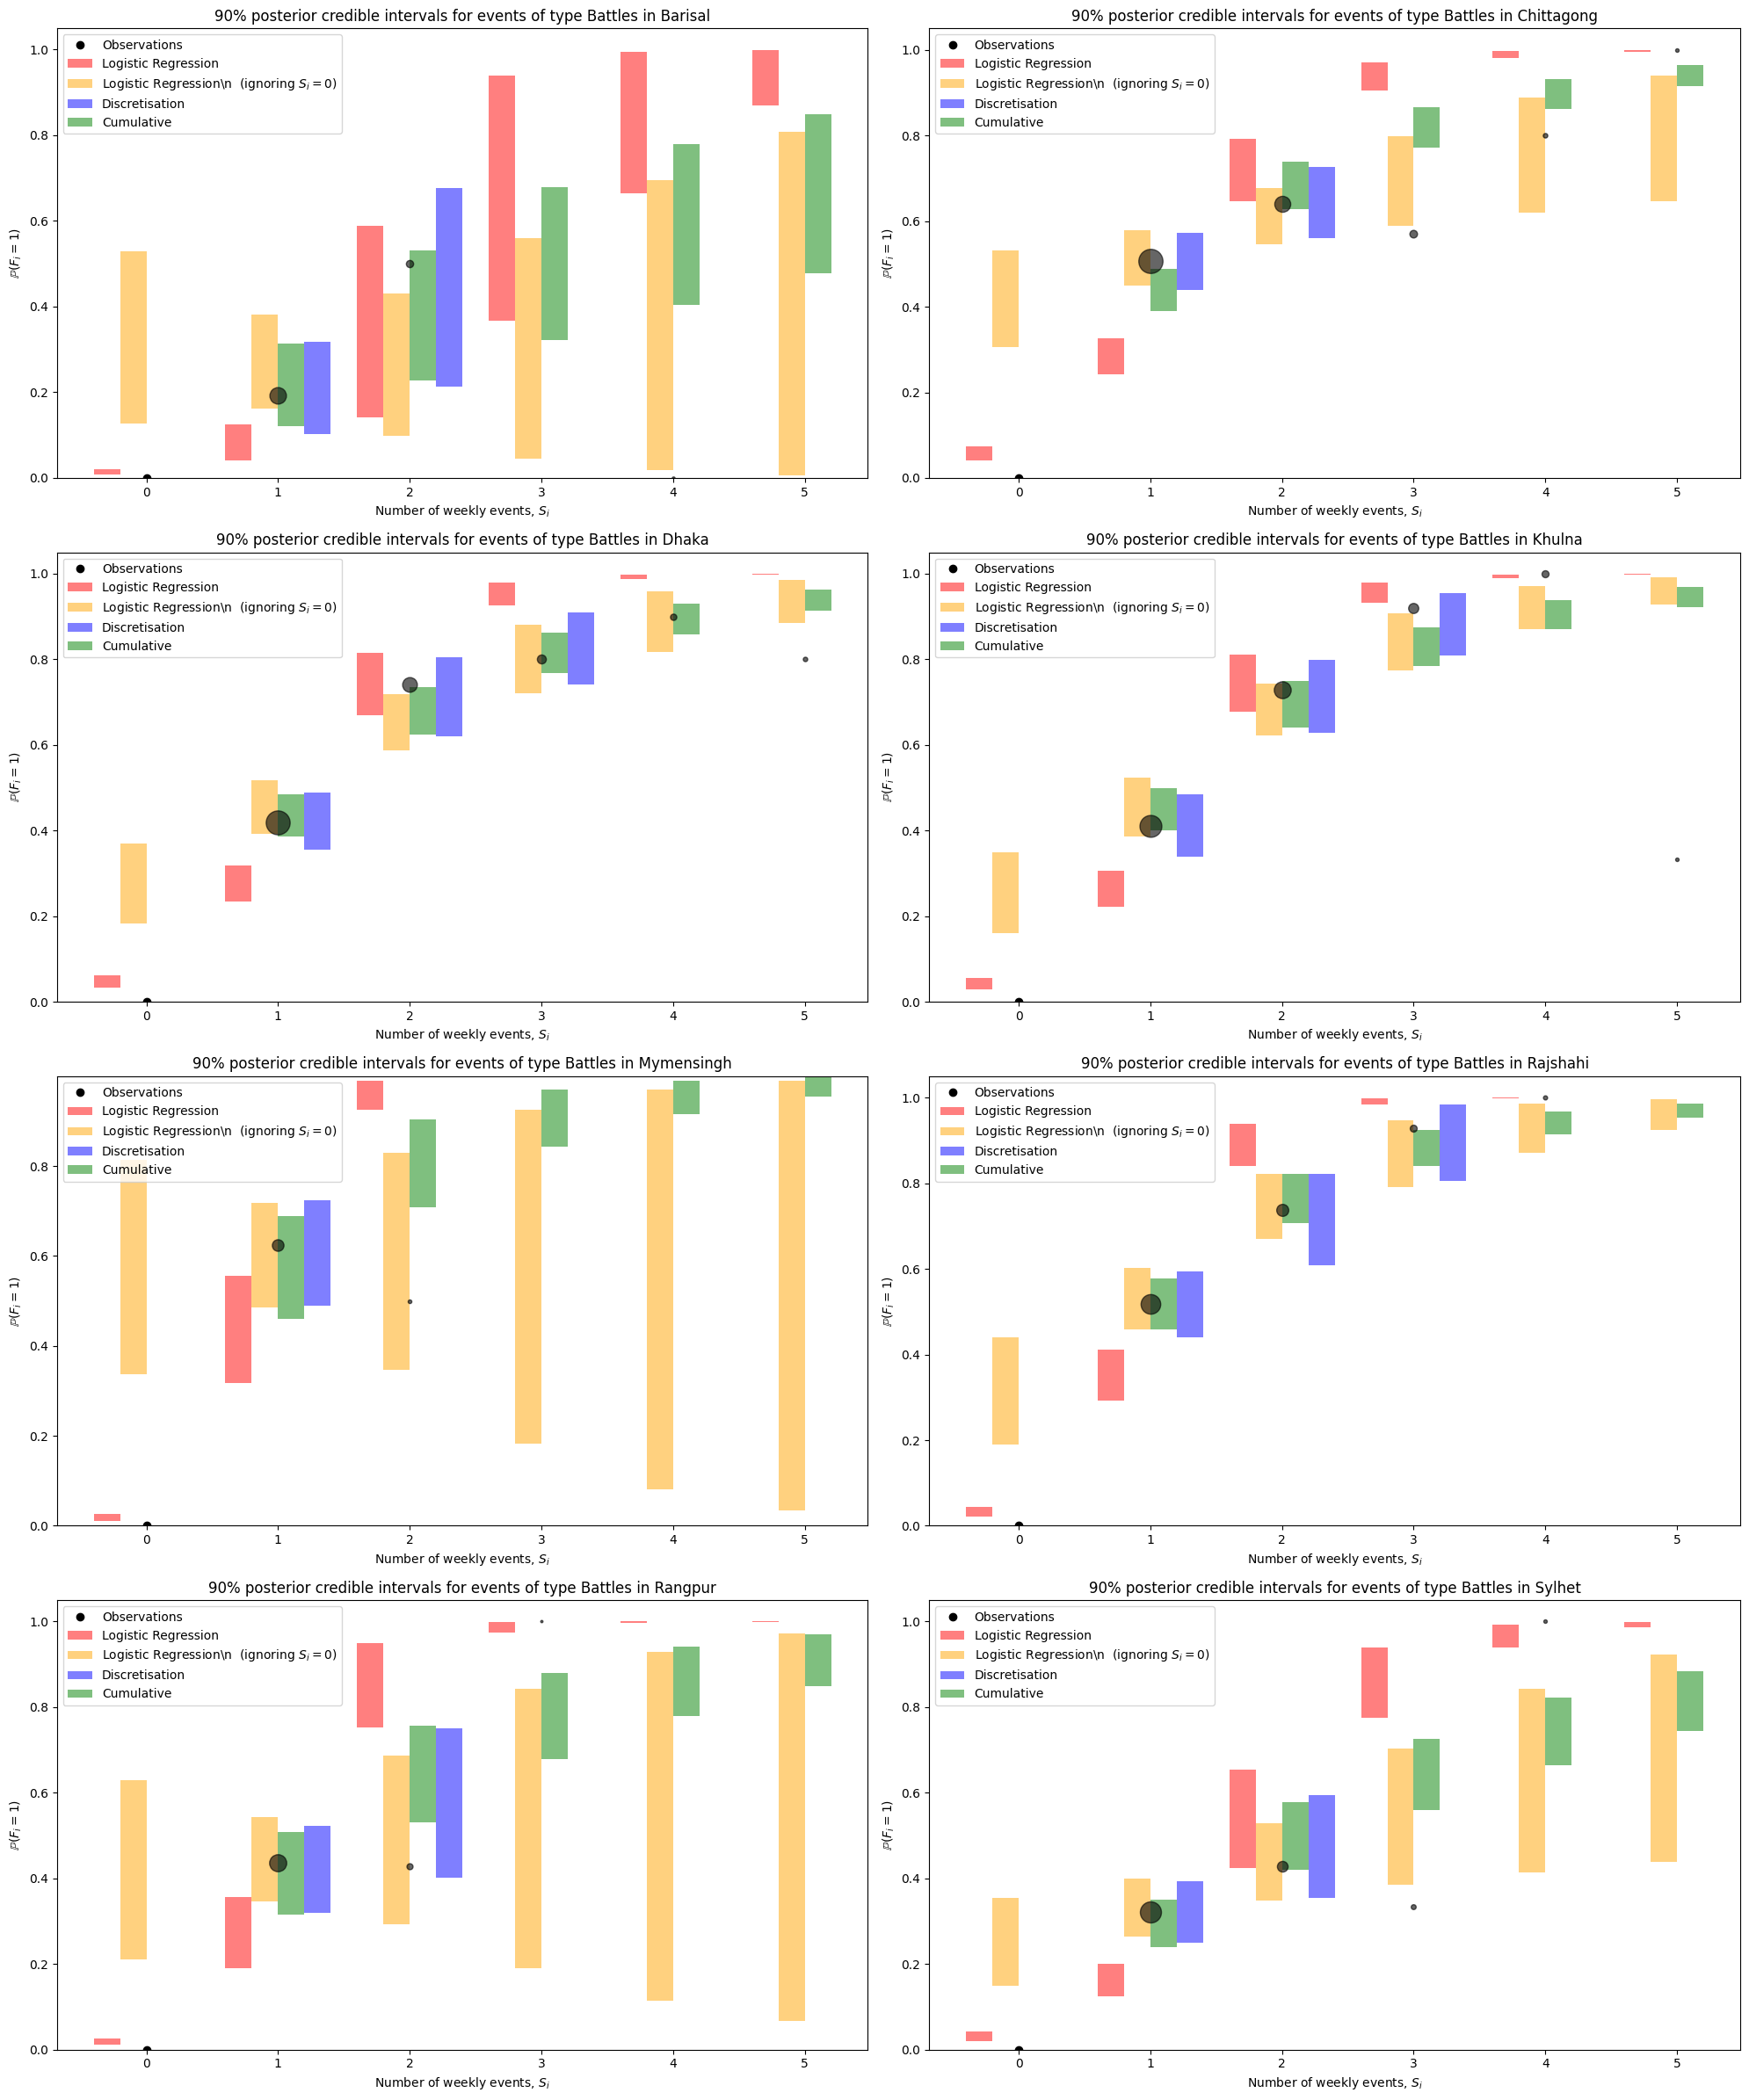

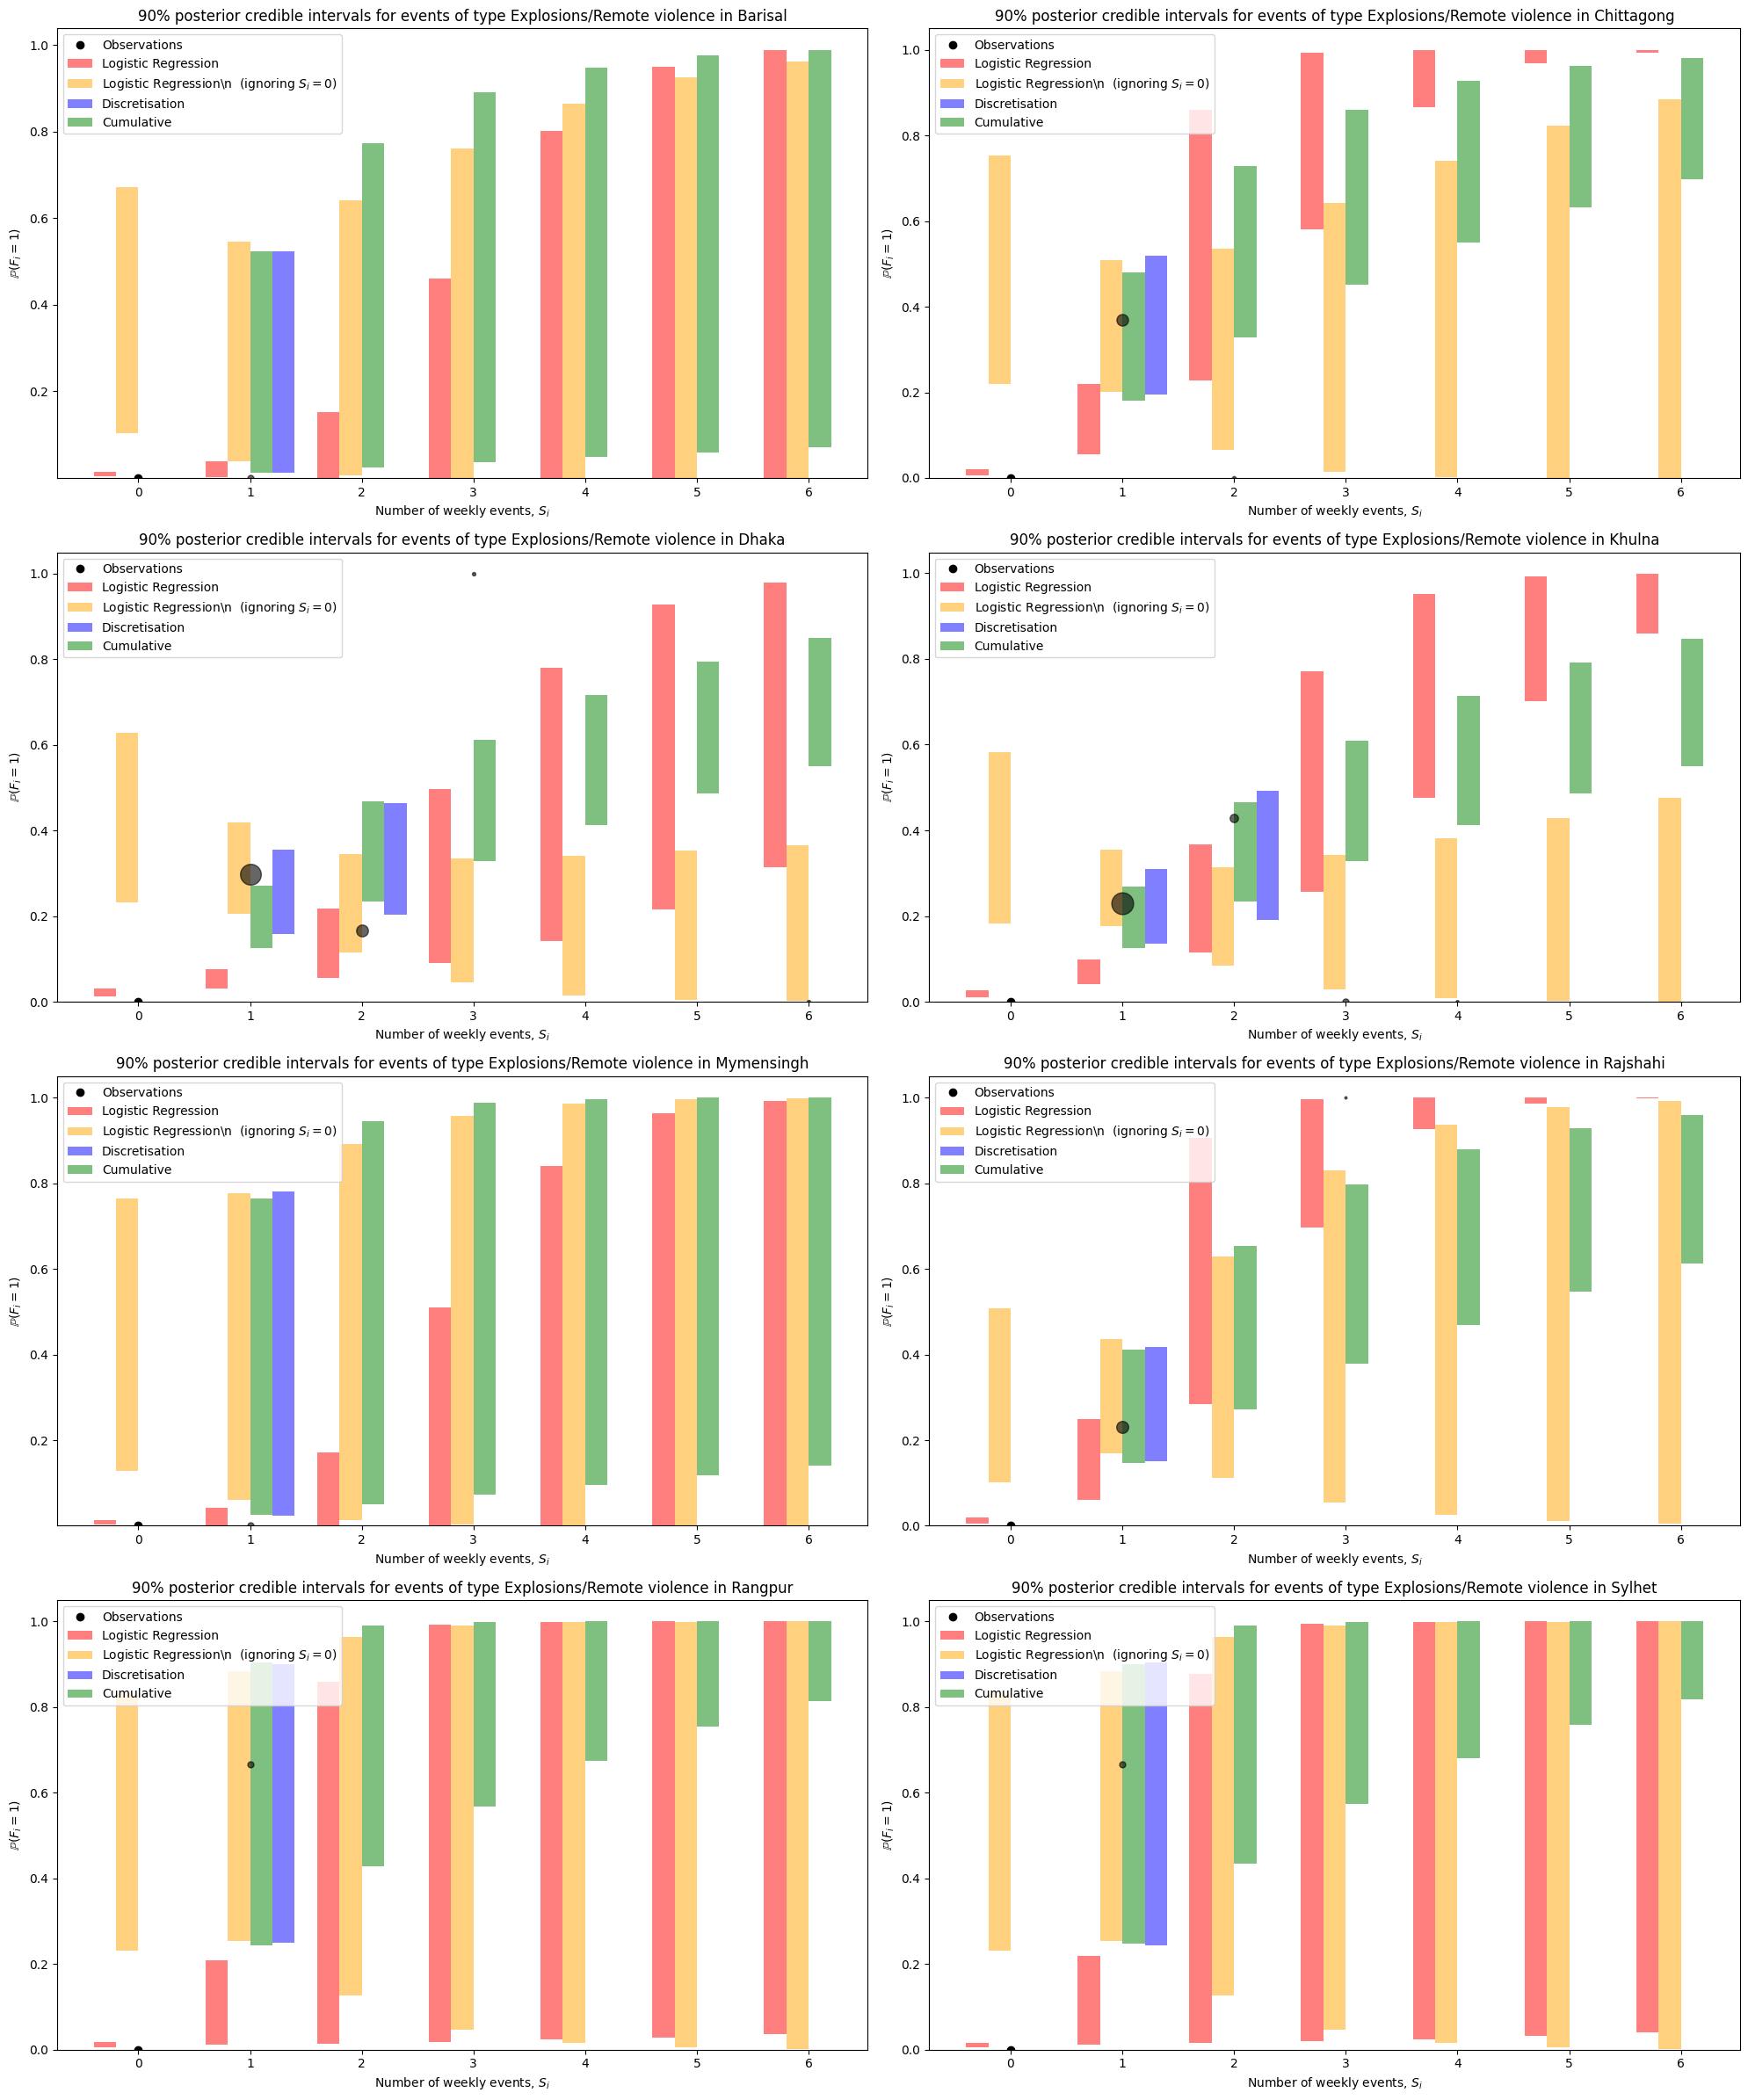

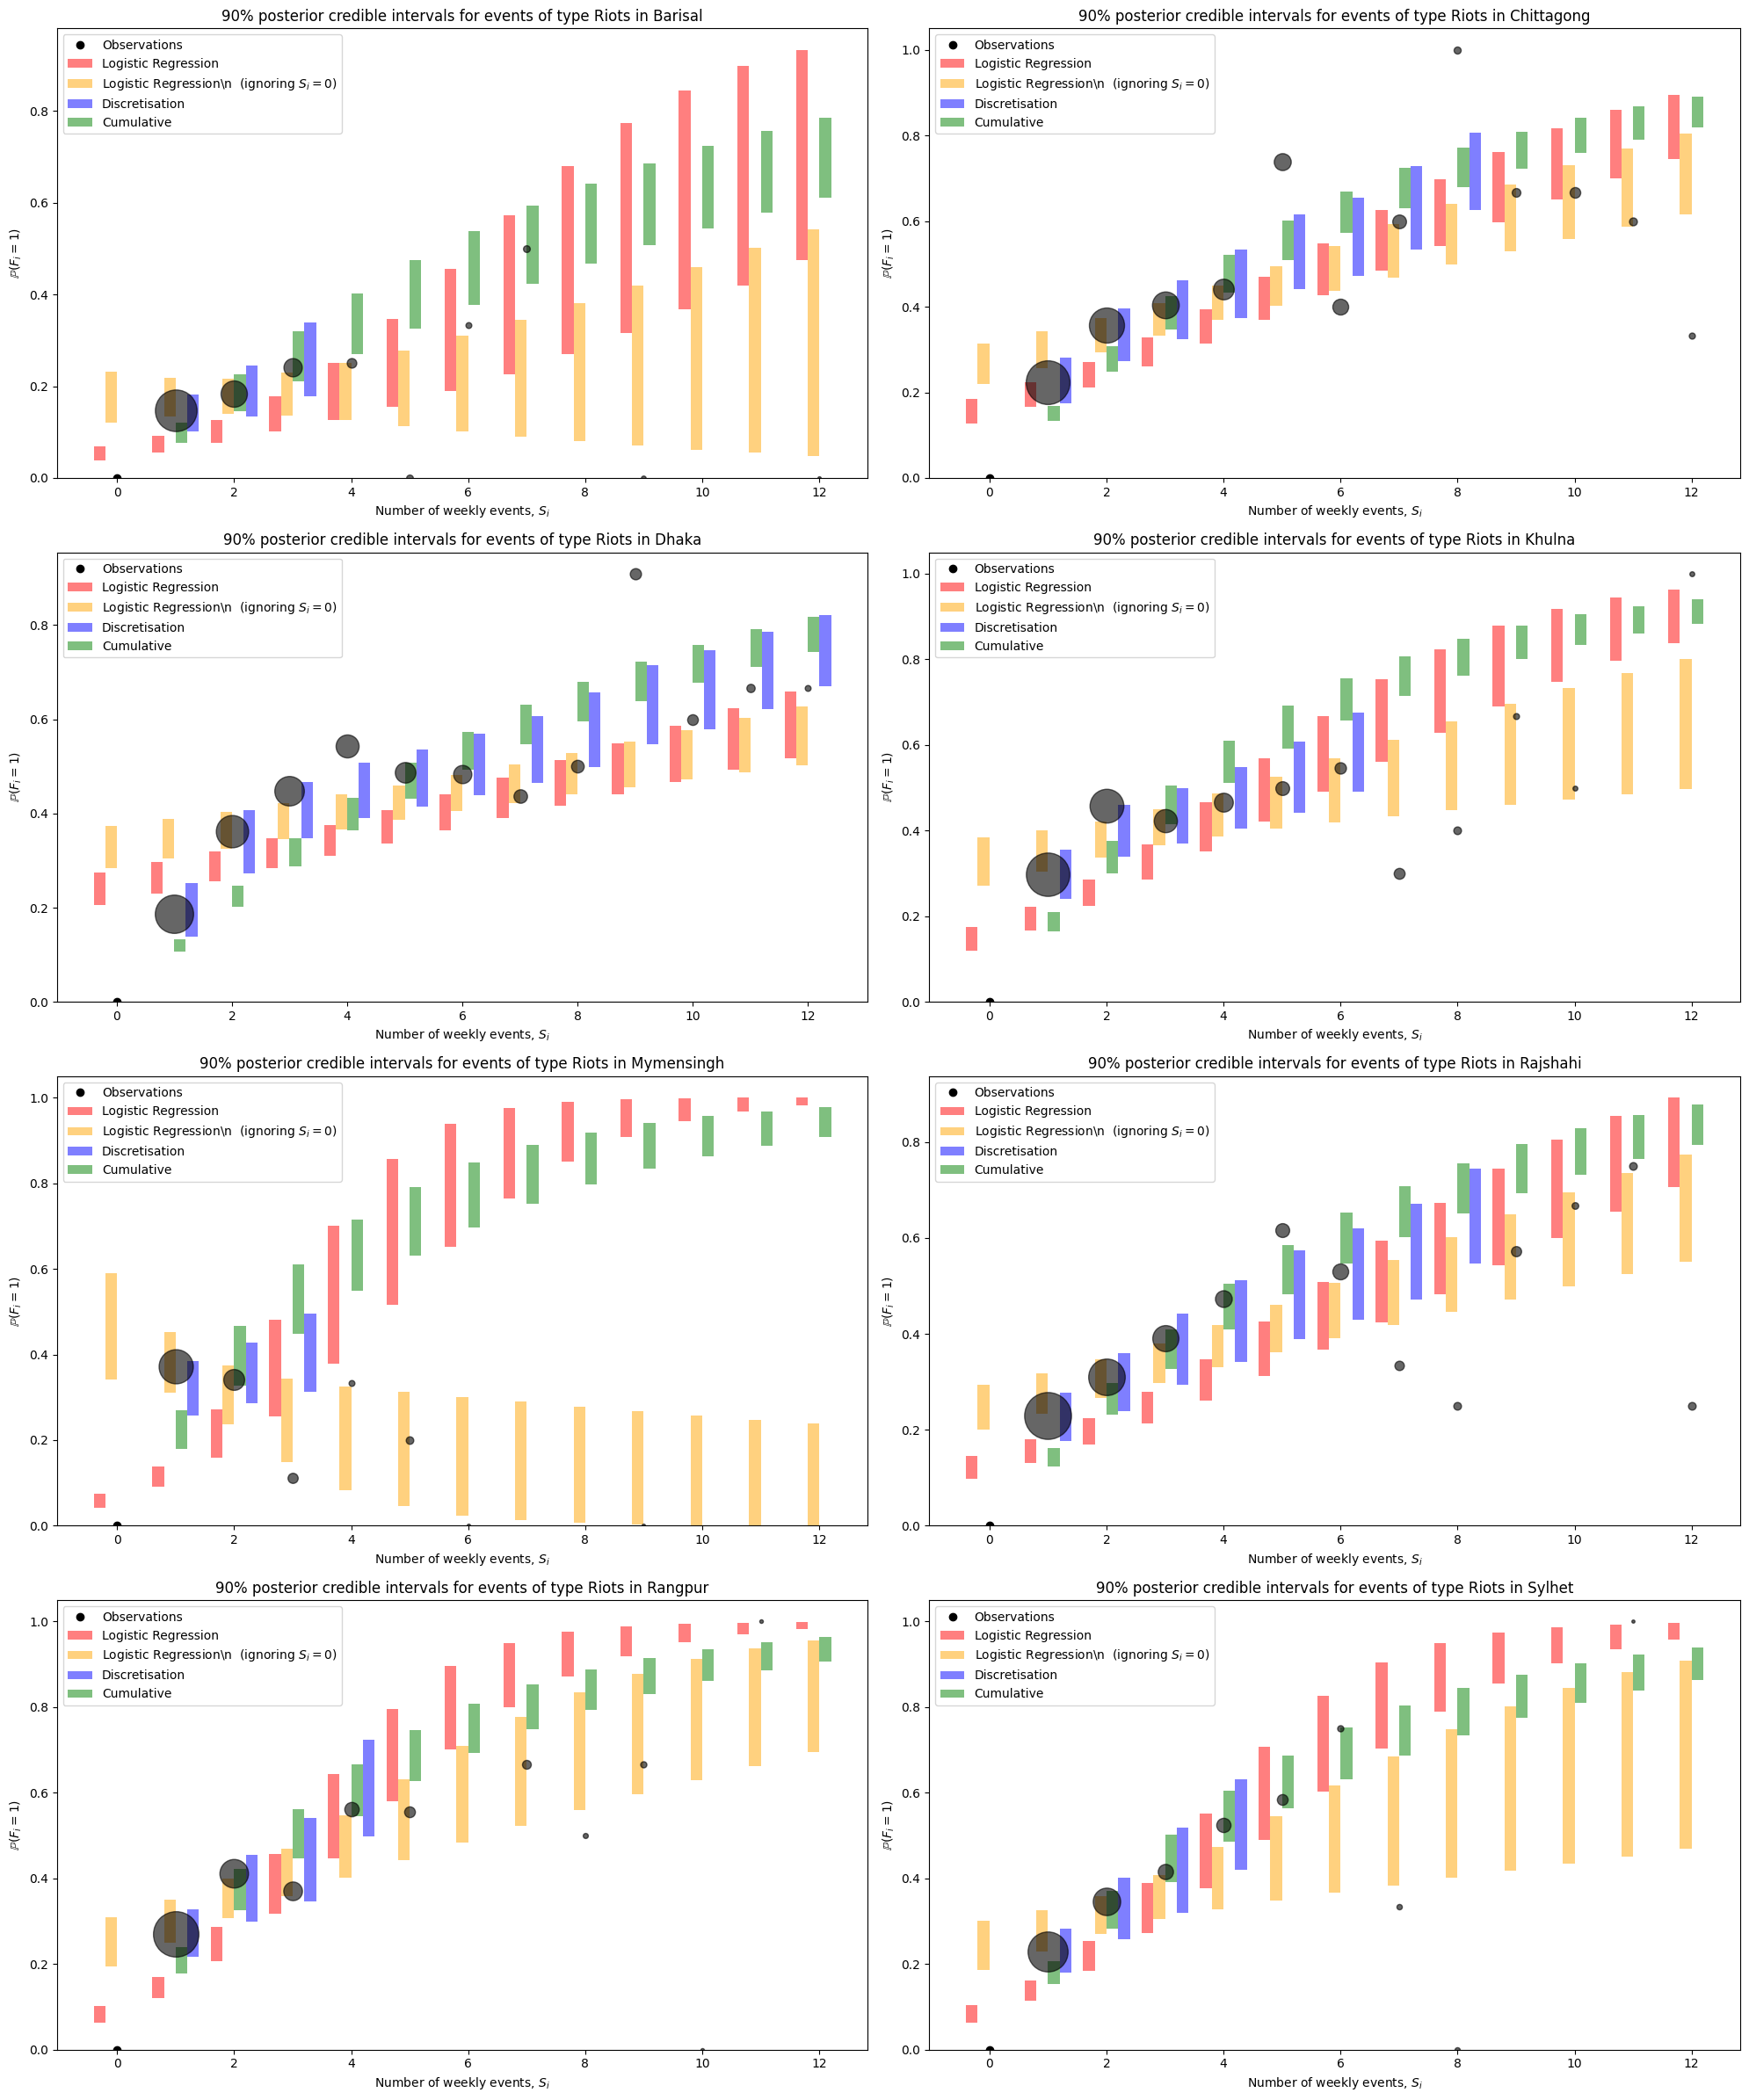

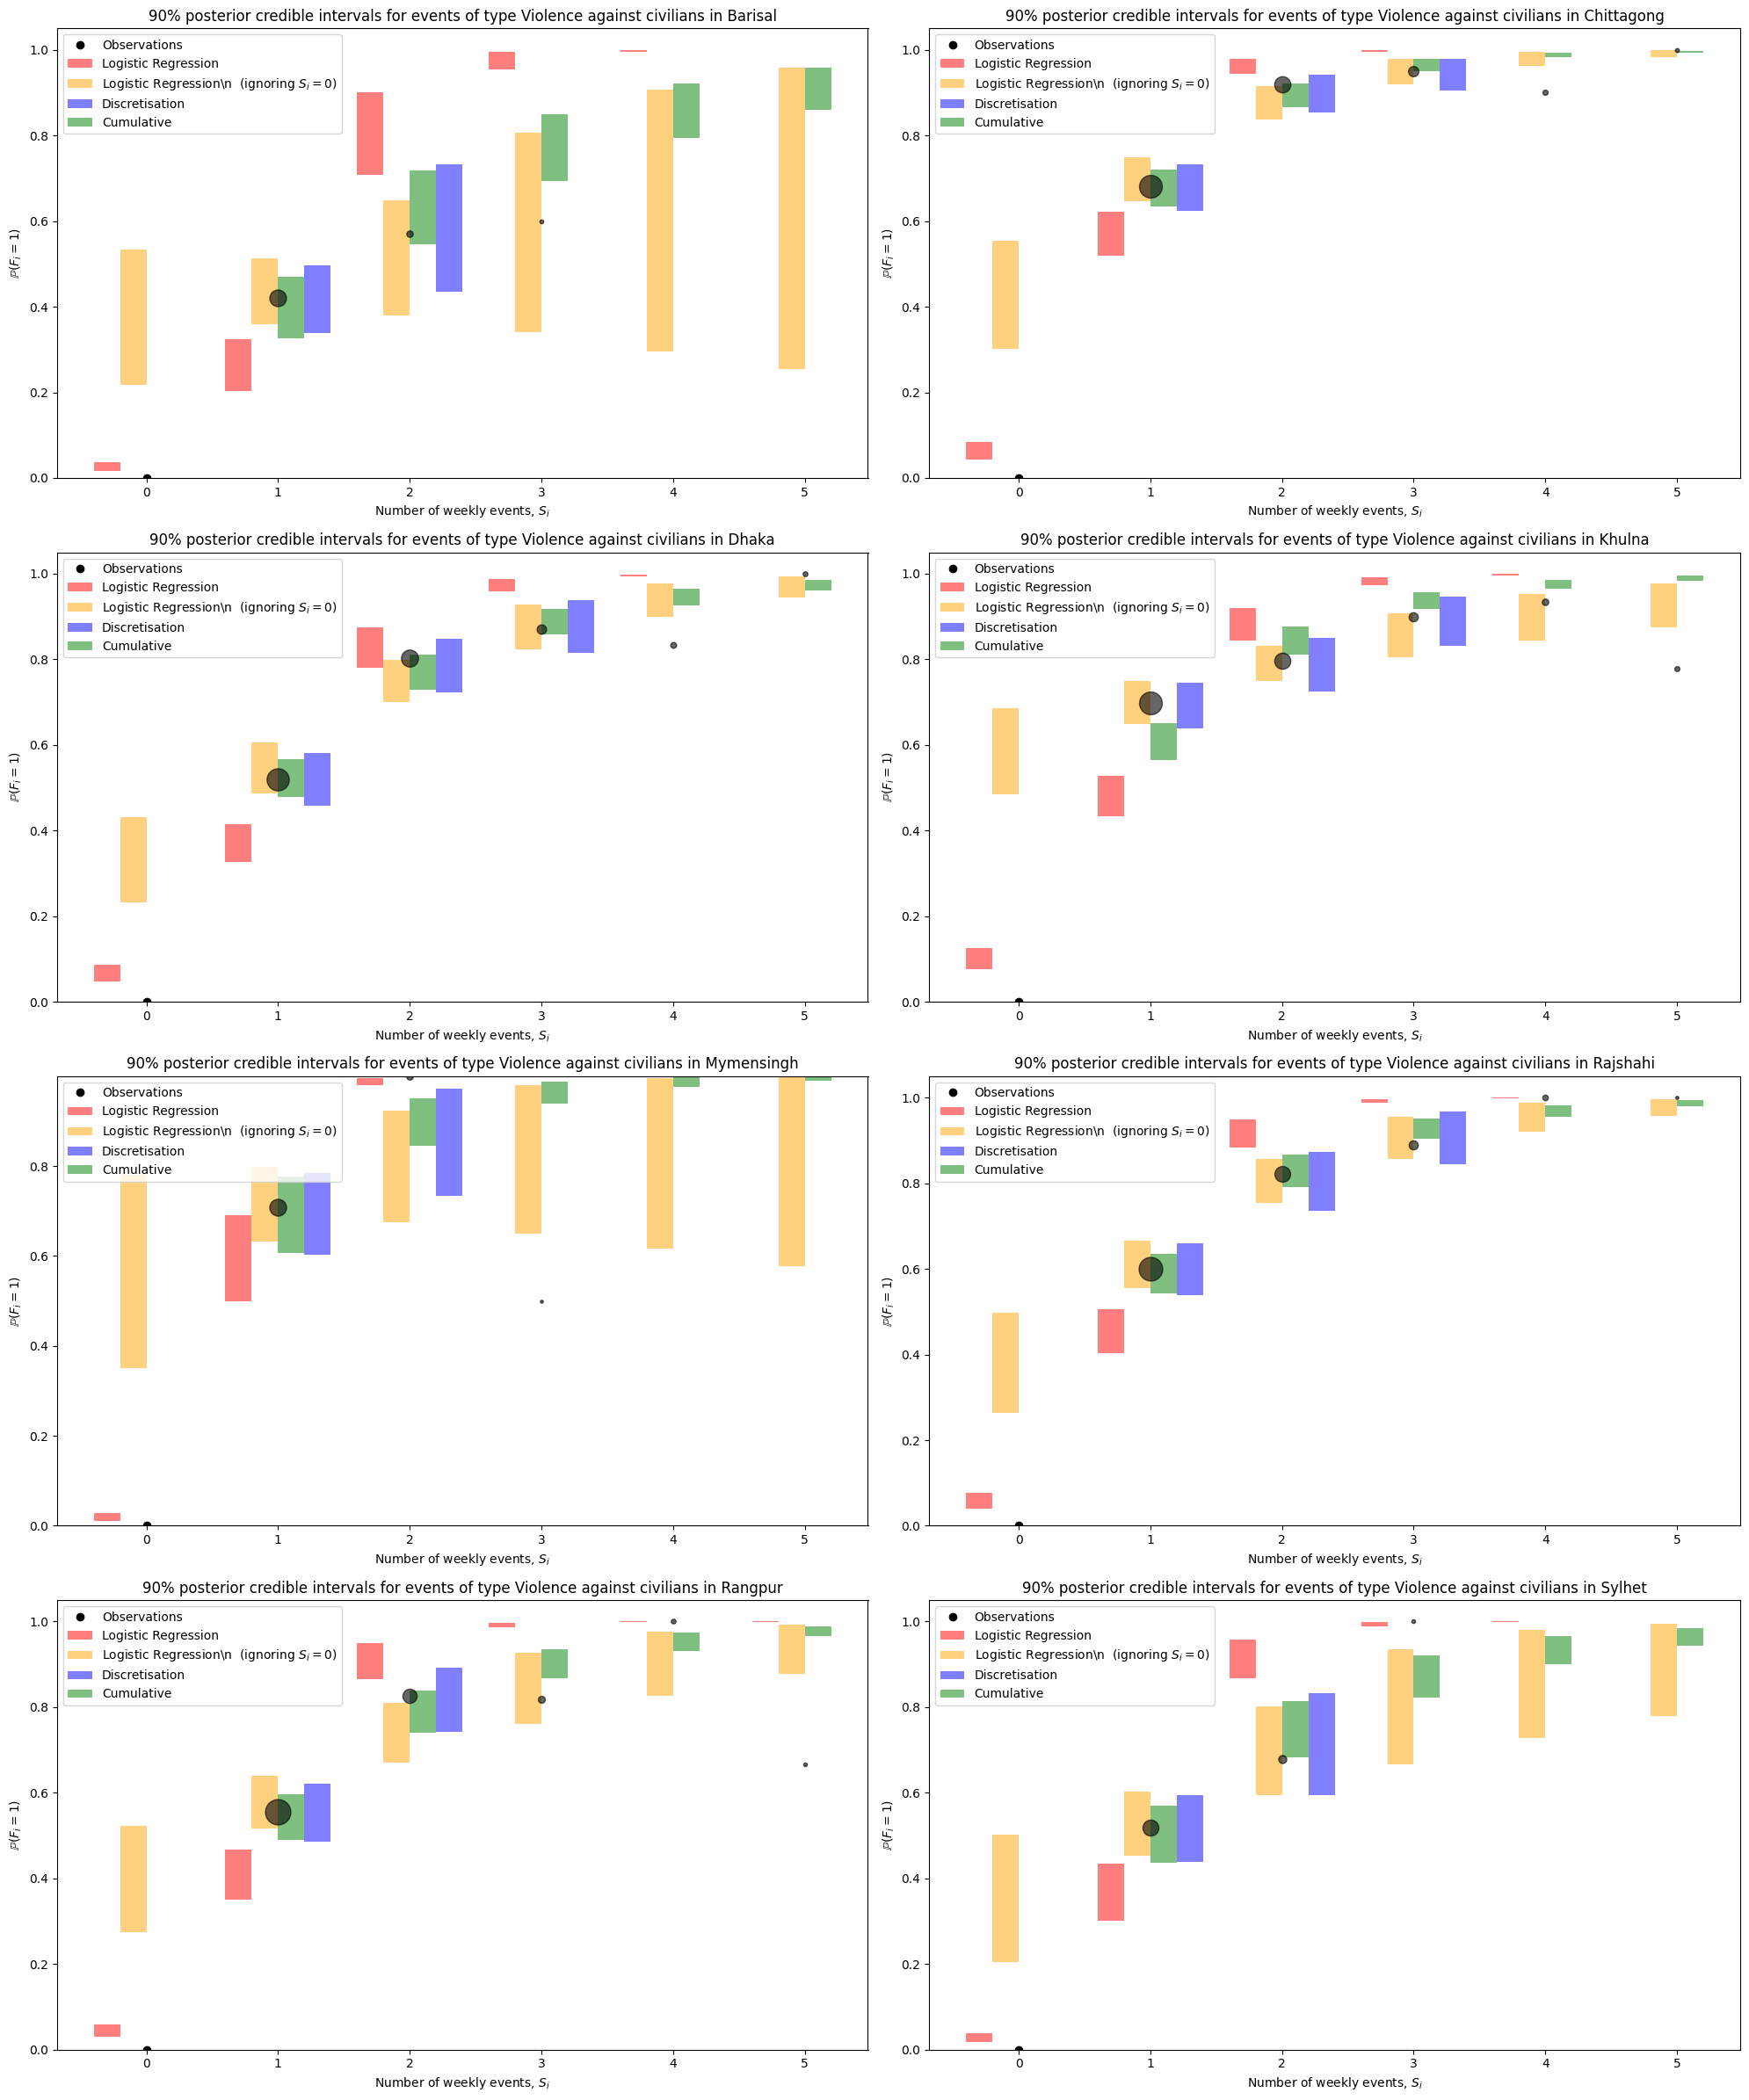

In [18]:
main_frame_cols = ['Event', 'Division', 'alpha', 'beta', 'alpha (ignore 0)', 'beta (ignore 0)', 'p', 'p.1']
mod4_frame_cols = ['Event', 'Division']
mod4_frame_cols.extend([f'p.{i}' for i in range(1, 13)])
marg_frame_cols = ['Event', 'Division', 'Logistic', 'Logistic-ignore zero', 'Discretisation', 'Cumulative', 'Null']

main_frame = pd.DataFrame(columns=main_frame_cols)
mod4_frame = pd.DataFrame(columns=mod4_frame_cols)
marg_frame = pd.DataFrame(columns=marg_frame_cols)

axis_upper_limits = [5, 6, 12, 5]

for event_idx, event in enumerate(violent_events):
    fig, ax = plt.subplots(4, 2, figsize=(20, 24))
    color = event_colours[event]
    for div_idx, division in enumerate(divisions):
        event_loc_data = weekly_data.loc[weekly_data['ADMIN1'] == division].loc[weekly_data['EVENT_TYPE'] == event]
        hori_idx = div_idx % 2
        vert_idx = div_idx // 2
        data_filter = {'ADMIN1':division, 'EVENT_TYPE':event}
        max_bin = auto_max_bin(data, data_filter, bin_size=0.1)
        mod4_param_names = ['pK']
        mod4_param_names.extend([f'p.{k}' for k in reversed(range(1, max_bin))])

        mod1_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan')[1][['alpha', 'beta_']].values
        mod1a_samples = model_sample(1, data, data_filter, stan_filepath='stan_files/model1.stan', ignore_zero=True)[1][['alpha', 'beta_']].values
        mod4_samples = model_sample(4, data, data_filter, stan_filepath='stan_files/model4.stan', max_bin=max_bin)[1][mod4_param_names].values
        mod4_samples = mod4_samples[:, ::-1]
        mod6_samples = model_sample(6, data, data_filter, stan_filepath='stan_files/model6.stan')[1]['p'].values
        # null_samples = model_sample('null', data, data_filter)['p.1'].values

        # mod1_mean = np.mean(mod1_samples, axis=0)
        # mod1a_mean = np.mean(mod1a_samples, axis=0)
        # mod4_mean = np.mean(mod4_samples, axis=0)
        # mod6_mean = np.mean(mod6_samples)
        # null_mean = np.mean(null_samples)

        count_axis = np.linspace(-0.2, axis_upper_limits[event_idx]+0.2, 1000)
        pos_axis = np.array([count for count in count_axis if count >= 0])

        nonzero_counts = []
        fatality_props = []
        num_obs_counts = []

        mod1_bottoms = []
        mod1_heights = []
        mod1a_bottoms = []
        mod1a_heights = []

        for count in range(axis_upper_limits[event_idx] + 1):
            count_data = event_loc_data.loc[event_loc_data['RAW_COUNTS'] == count]
            if len(count_data) > 0:
                zero_fatal = len(count_data.loc[count_data['FATALITIES'] == 0])
                with_fatal = len(count_data.loc[count_data['FATALITIES'] > 0])
                fatal_prop = with_fatal / (zero_fatal + with_fatal)
                if count != 0:
                    fatality_props.append(fatal_prop)
                    nonzero_counts.append(count)
                    num_obs_counts.append(with_fatal+zero_fatal)
                else:
                    ax[vert_idx, hori_idx].plot(count, fatal_prop, 'ko', label='Observations')

            model1_probs = [single_logit(count, sample) for sample in mod1_samples]
            lower = np.quantile(model1_probs, 0.05)
            upper = np.quantile(model1_probs, 0.95)
            mod1_bottoms.append(lower)
            mod1_heights.append(upper - lower)

            model1a_probs = [single_logit(count, sample) for sample in mod1a_samples]
            lower = np.quantile(model1a_probs, 0.05)
            upper = np.quantile(model1a_probs, 0.95)
            mod1a_bottoms.append(lower)
            mod1a_heights.append(upper-lower)

            # model1a_probs = [single_logit(count, sample) for sample in mod1a_samples]

        disc_axis = np.array([i for i in range(axis_upper_limits[event_idx] + 1)])

        lower = np.quantile(mod4_samples, 0.05, axis=0)
        upper = np.quantile(mod4_samples, 0.95, axis=0)
        mod4_bottoms = lower
        mod4_heights = upper - lower
        mod4_axis = np.array([i for i in range(1, len(mod4_heights)+ 1)])

        lower_obs = np.quantile(mod6_samples, 0.05)
        upper_obs = np.quantile(mod6_samples, 0.95)
        lower = np.array([1-(1-lower_obs)**i for i in disc_axis])
        upper = np.array([1-(1-upper_obs)**i for i in disc_axis])
        mod6_bottoms = lower
        mod6_heights = upper - lower

        ax[vert_idx, hori_idx].bar(disc_axis-0.4, mod1_heights, bottom=mod1_bottoms, align='edge', color='red', alpha=0.5, width=0.2, label='Logistic Regression')
        ax[vert_idx, hori_idx].bar(disc_axis-0.2, mod1a_heights, bottom=mod1a_bottoms, align='edge', color='orange', alpha=0.5, width=0.2, label=fr'Logistic Regression\n  (ignoring $S_i=0$)')
        ax[vert_idx, hori_idx].bar(mod4_axis+0.2, mod4_heights, bottom=mod4_bottoms, align='edge', color='blue', alpha=0.5, width=0.2, label='Discretisation')
        ax[vert_idx, hori_idx].bar(disc_axis, mod6_heights, bottom=mod6_bottoms, align='edge', color='green', alpha=0.5, width=0.2, label='Cumulative')

        for count, fatal_prop, num_obs in zip(nonzero_counts, fatality_props, num_obs_counts):
            ax[vert_idx, hori_idx].plot(count, fatal_prop, 'ko', markersize=5*len(num_obs_counts)*(num_obs/np.sum(num_obs_counts))**(1/2), alpha=0.6)

        # mod1_probs = [single_logit(count, mod1_mean) for count in count_axis]
        # mod1a_probs = [single_logit(count, mod1a_mean) for count in count_axis]
        # mod6_probs = [1-(1-mod6_mean)**count for count in pos_axis]
        # null_probs = [1-(1-null_mean)**count for count in pos_axis]

        # ax[vert_idx, hori_idx].plot(count_axis, mod1_probs, c='r', label='Logistic Regression')
        # ax[vert_idx, hori_idx].plot(count_axis, mod1a_probs, c='orange', label='Logistic Regression\n  (ignoring 0)')
        # ax[vert_idx, hori_idx].plot(pos_axis, mod6_probs, c='b', label='Cumulative Probability')
        # # ax[vert_idx, hori_idx].plot(pos_axis, null_probs, c='b', label='Null Model')
        # ax[vert_idx, hori_idx].plot(range(1, len(mod4_mean) + 1), mod4_mean, color=color, marker='_', markersize=20, label='Discretisation', linestyle='None')
        # fig, ax[vert_idx, hori_idx] = posterior_probability_plot(4, mod4_samples, box=False, color=color, ax=ax[vert_idx, hori_idx], fig=fig)

        ax[vert_idx, hori_idx].set(title=f'90% posterior credible intervals for events of type {event} in {division}',
                        xlabel=r'Number of weekly events, $S_i$',
                        ylabel=r'$\mathbb{P}(F_i=1)$')
        
        ax[vert_idx, hori_idx].legend(loc='upper left')
        print(f'\n\n\nlocation {division} completed for event {event}\n\n\n')
        
    plt.tight_layout()
    print(f'event {event} completed')
        
plt.tight_layout()
plt.show()

In [109]:
list(marg_frame)

['Event',
 'Division',
 'Logistic',
 'Logistic-ignore zero',
 'Discretisation',
 'Cumulative',
 'Null',
 'Preferred Model',
 'Evidence']

In [111]:
marg_frame_rounded = marg_frame

round_cols = ['Logistic', 'Logistic-ignore zero', 'Discretisation', 'Cumulative', 'Null', 'Evidence']

marg_frame_rounded[round_cols] = marg_frame_rounded[round_cols].round(2)

In [114]:
marg_frame.to_csv('marg_liks_revised.csv')

In [116]:
list(main_frame)

['Event',
 'Division',
 'alpha',
 'beta',
 'alpha (ignore 0)',
 'beta (ignore 0)',
 'p',
 'p.1']

In [118]:
round_cols = ['alpha', 'beta', 'alpha (ignore 0)', 'beta (ignore 0)', 'p', 'p.1']

main_frame[round_cols] = main_frame[round_cols].round(2)

In [120]:
main_frame.to_csv('main_frame.csv')

In [126]:
round_cols = list(mod4_frame)
round_cols.remove('Event')
round_cols.remove('Division')

mod4_frame[round_cols] = mod4_frame[round_cols].round(2)

In [128]:
mod4_frame.to_csv('mod4_frame.csv')